# Child Mind Institute Problematic Internet Use
# Exploratory Data Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning) 

sns.set(style='whitegrid')
%matplotlib inline

In [3]:
train_data = pd.read_csv('/kaggle/input/cmi-piu/train.csv')
test_data = pd.read_csv('/kaggle/input/cmi-piu/test.csv')
data_description = pd.read_csv('/kaggle/input/cmi-piu/data_dictionary.csv')

### Train Data

In [4]:
display(train_data.head())
print(f'Shape of Training Data: {train_data.shape}')

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of Training Data: (3960, 82)


### Test Data

In [5]:
display(test_data.head())
print(f'Shape of Testing Data: {test_data.shape}')

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of Testing Data: (20, 59)


### Data Dictionary

In [6]:
display(data_description.head())
print(f'Shape of Data Dictionary: {data_description.shape}')

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


Shape of Data Dictionary: (81, 6)


The target variable, sii, is derived from the PCIAT-PCIAT_Total, which represents the total score from the Parent-Child Internet Addiction Test. This test consists of 20 items, each scored on a scale from 0 to 5. Based on the cumulative score, sii is categorized as follows:
* 0: None (Score 0–30)
* 1: Mild (Score 31–49)
* 2: Moderate (Score 50–79)
* 3: Severe (Score 80 and above)

This classification makes sii an ordinal categorical variable with four levels, where the order of these categories carries significance. 

Alternatively, we could predict the continuous PCIAT-PCIAT_Total score as the target variable and then map these predictions to sii categories using the thresholds above. This method allows us to leverage the ordinal structure of sii while also capturing the underlying variability in PCIAT-PCIAT_Total.

#### **Identifying features in the training dataset that are absent from the testing dataset**

In [7]:
train_features = set(train_data.columns)
test_features = set(test_data.columns)
exclusive_train_columns = sorted(list(train_features - test_features))
display(data_description[data_description['Field'].isin(exclusive_train_columns)])
print(f'Count of columns related to target but absent in test set: {len(exclusive_train_columns) - 1}')

,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."


Count of columns related to target but absent in test set: 22


In [8]:
pciat_score_ranges = train_data.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_score_ranges = pciat_score_ranges.rename(columns={
    'min': 'Minimum PCIAT Total Score',
    'max': 'Maximum PCIAT Total Score'
})
pciat_score_ranges

,Minimum PCIAT Total Score,Maximum PCIAT Total Score
sii,,
0.0,0.0,30.0
1.0,31.0,49.0
2.0,50.0,79.0
3.0,80.0,93.0


In [9]:
data_description[data_description['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [10]:
sii_related_data = train_data[train_data['sii'].notna()][exclusive_train_columns]
sii_related_data[sii_related_data.isna().any(axis=1)].head().style.applymap(
    lambda val: 'background-color: #ff0000' if pd.isna(val) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,Summer,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,Fall,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,Fall,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,Winter,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,Spring,0.000000


For example, in rows with partially missing scores, one answer’s absence could increase the possible total by up to 5 points, potentially shifting the sii category to a higher level. Notably, in the second row, PCIAT-PCIAT_Total and sii are filled despite missing answers, suggesting possible manual adjustments or data entry errors. This highlights the importance of handling missing data carefully to maintain the accuracy of sii predictions.

#### **Checking if PCIAT-PCIAT_Total matches the sum of non-NA responses in individual PCIAT items (01–20)**

In [11]:
pciat_items = [f'PCIAT-PCIAT_{str(i+1).zfill(2)}' for i in range(20)]
recalculated_total = sii_related_data[pciat_items].sum(axis=1, skipna=True)
(recalculated_total == sii_related_data['PCIAT-PCIAT_Total']).all()

True

To confirm that PCIAT-PCIAT_Total represents the sum of responses across the 20 individual PCIAT items, we recalculated it by summing non-missing values across the PCIAT-PCIAT_01 to PCIAT-PCIAT_20 columns. Our validation revealed occasional discrepancies in sii scores, likely due to missing values affecting the total.

Given this, we created a recalculated sii based on the PCIAT-PCIAT_Total and a maximum potential score assuming that unanswered items could contribute up to 5 points each. This approach ensures that sii aligns with its intended thresholds even when responses are missing.

In [12]:
def adjust_sii_score(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_potential_score = row['PCIAT-PCIAT_Total'] + row[pciat_items].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_potential_score <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_potential_score <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_potential_score <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_potential_score >= 80:
        return 3
    return np.nan

train_data['revised_sii'] = train_data.apply(adjust_sii_score, axis=1)

#### **Verification of rows with different original and recalculated sii:**

In [13]:
discrepancy_rows = train_data[
    (train_data['revised_sii'] != train_data['sii']) & train_data['sii'].notna()
]
discrepancy_rows[pciat_items + ['PCIAT-PCIAT_Total', 'sii', 'revised_sii']].style.applymap(
    lambda cell: 'background-color: #ff0000' if pd.isna(cell) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,revised_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


In [14]:
train_data['sii'] = train_data['revised_sii']
train_data['total_full_responses'] = train_data['PCIAT-PCIAT_Total'].where(
    train_data[pciat_items].notna().all(axis=1), np.nan
)

sii_labels = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train_data['sii'] = train_data['sii'].map(sii_labels).fillna('Missing')

sii_levels = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train_data['sii'] = pd.Categorical(train_data['sii'], categories=sii_levels, ordered=True)
train_data.drop(columns='revised_sii', inplace=True)

#### **Plotting the distribution of sii**

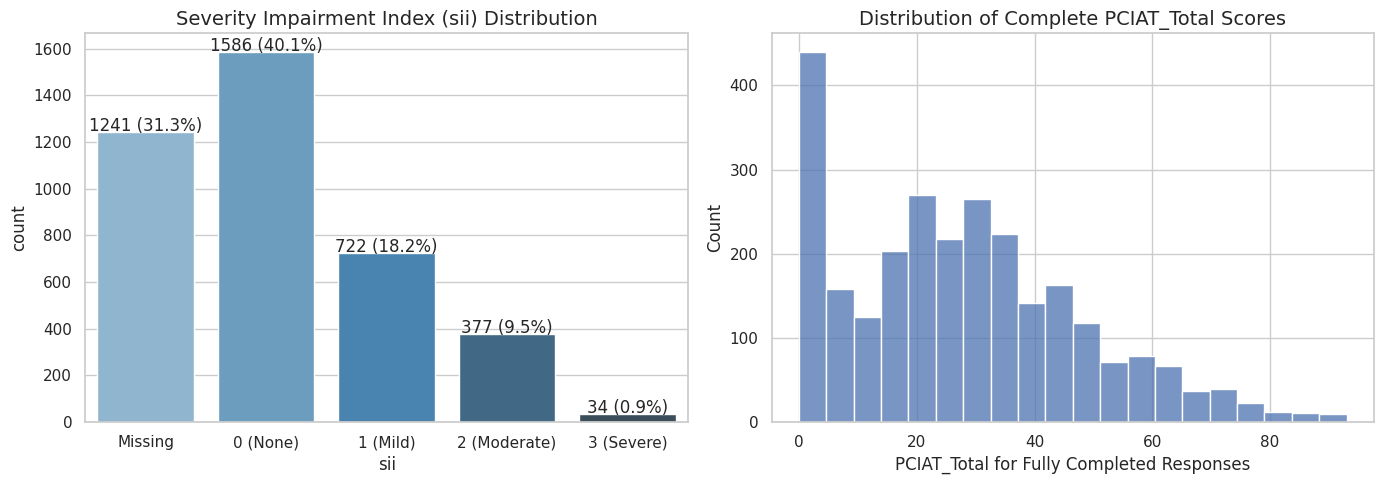

In [15]:
sii_distribution = train_data['sii'].value_counts().reset_index()
sii_distribution.columns = ['sii', 'count']
total_counts = sii_distribution['count'].sum()
sii_distribution['percentage'] = (sii_distribution['count'] / total_counts) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of sii distribution
sns.barplot(x='sii', y='count', data=sii_distribution, palette='Blues_d', ax=axes[0])
axes[0].set_title('Severity Impairment Index (sii) Distribution', fontsize=14)
for bar in axes[0].patches:
    height = bar.get_height()
    pct = sii_distribution.loc[sii_distribution['count'] == height, 'percentage'].values[0]
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 5, f'{int(height)} ({pct:.1f}%)',
        ha="center", fontsize=12
    )

# Histogram of PCIAT_Total for complete responses
sns.histplot(train_data['total_full_responses'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of Complete PCIAT_Total Scores', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Fully Completed Responses')

plt.tight_layout()
plt.show()

In [16]:
len(train_data[train_data['total_full_responses'] == 0])

307

After adjusting the sii scores, we analyzed the distribution of categories:
* Approximately 40% of participants were unaffected by problematic internet use.
* Around 31% were unassessed due to incomplete data.
* Only a small portion, roughly 10%, exhibited moderate to severe impairment.

Furthermore, there are 307 participants who scored zero on all PCIAT items, suggesting no signs of internet use issues according to the assessment criteria.

In [17]:
def generate_summary(dataframe, columns):
    if isinstance(columns, str):
        columns = [columns]

    summary_stats = []
    for feature in columns:
        if dataframe[feature].dtype in ['object', 'category']:
            counts = dataframe[feature].value_counts(dropna=False, sort=False)
            proportions = dataframe[feature].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted_counts = counts.astype(str) + ' (' + proportions.round(2).astype(str) + '%)'
            feature_summary = pd.DataFrame({'count (%)': formatted_counts})
            summary_stats.append(feature_summary)
        else:
            feature_summary = dataframe[feature].describe().to_frame().transpose()
            feature_summary['missing'] = dataframe[feature].isnull().sum()
            feature_summary.index.name = feature
            summary_stats.append(feature_summary)

    return pd.concat(summary_stats, axis=0)

#### **SII by Age and Sex**

In [18]:
train_data['Age_Group'] = pd.cut(
    train_data['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)
generate_summary(train_data, 'Age_Group')

,count (%)
Age_Group,
Children (5-12),2919 (73.71%)
Adolescents (13-18),953 (24.07%)
Adults (19-22),88 (2.22%)


In [19]:
gender_labels = {0: 'Male', 1: 'Female'}
train_data['Basic_Demos-Sex'] = train_data['Basic_Demos-Sex'].map(gender_labels)
generate_summary(train_data, 'Basic_Demos-Sex')

,count (%)
Basic_Demos-Sex,
Male,2484 (62.73%)
Female,1476 (37.27%)


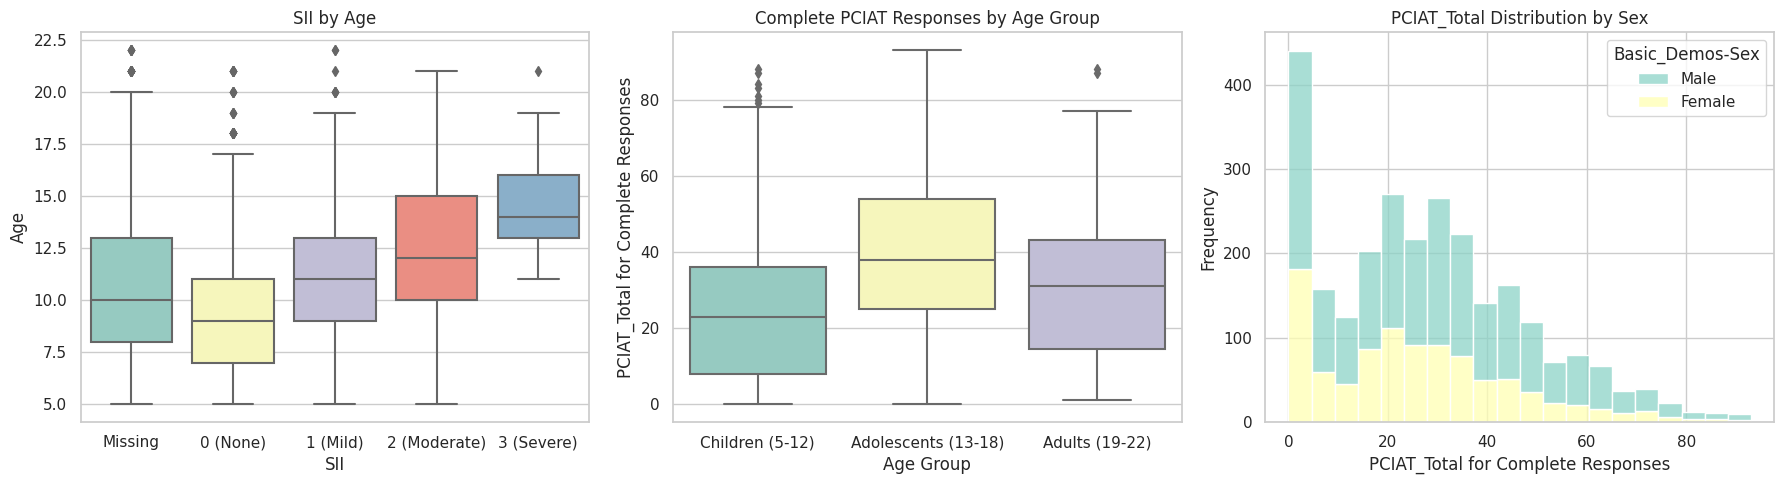

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot SII by Age
sns.boxplot(y=train_data['Basic_Demos-Age'], x=train_data['sii'], ax=axes[0], palette="Set3")
axes[0].set_title('SII by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('SII')

# Plot complete PCIAT responses by age group
sns.boxplot(x='Age_Group', y='total_full_responses', data=train_data, palette="Set3", ax=axes[1])
axes[1].set_title('Complete PCIAT Responses by Age Group')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_xlabel('Age Group')

# Plot PCIAT_Total distribution by gender
sns.histplot(
    data=train_data, x='total_full_responses',
    hue='Basic_Demos-Sex', multiple='stack',
    palette="Set3", bins=20, ax=axes[2]
)
axes[2].set_title('PCIAT_Total Distribution by Sex')
axes[2].set_xlabel('PCIAT_Total for Complete Responses')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

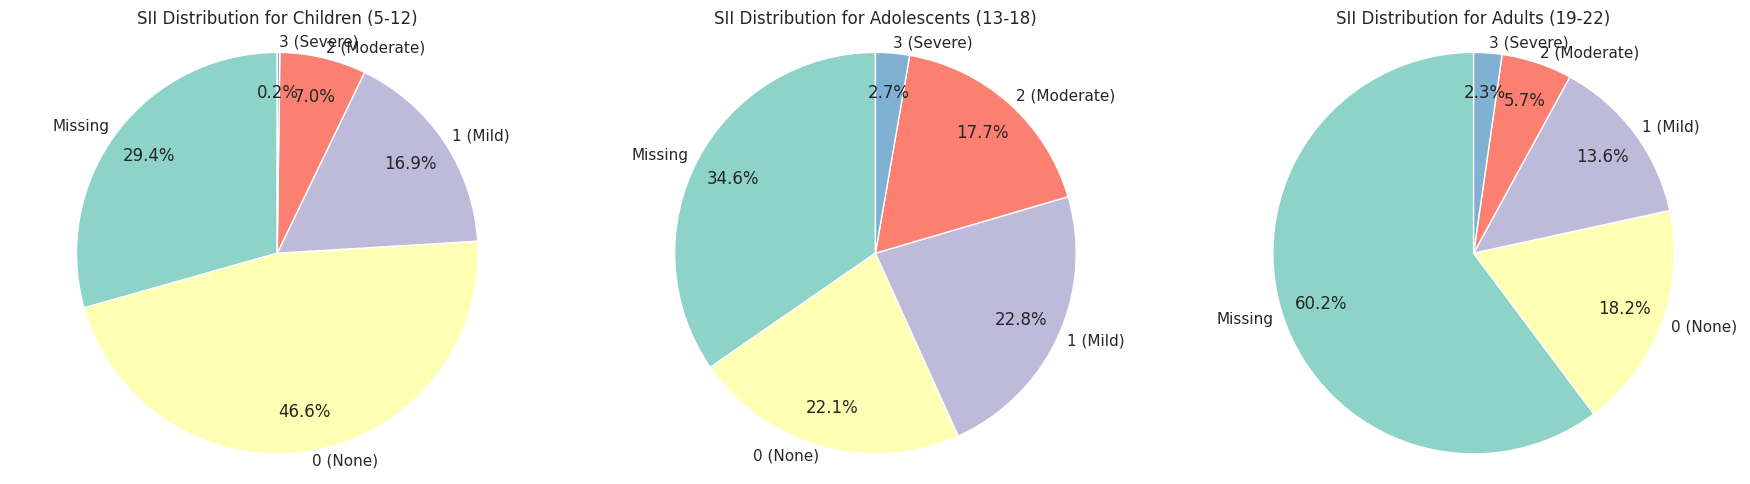

In [21]:
age_sii_stats = train_data.groupby(['Age_Group', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(age_sii_stats), figsize=(18, 5))

for idx, age_group in enumerate(age_sii_stats.index):
    age_group_distribution = age_sii_stats.loc[age_group] / age_sii_stats.loc[age_group].sum()
    axes[idx].pie(
        age_group_distribution, labels=age_group_distribution.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[idx].set_title(f'SII Distribution for {age_group}')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

The distribution of sii across different age groups:

In [22]:
sii_counts = train_data.groupby(['Age_Group', 'sii']).size().unstack(fill_value=0)
sii_percentages = sii_counts.div(sii_counts.sum(axis=1), axis=0) * 100

sii_counts_str = sii_counts.astype(str) + ' (' + sii_percentages.round(1).astype(str) + '%)'
sii_counts_str

sii,Missing,0 (None),1 (Mild),2 (Moderate),3 (Severe)
Age_Group,,,,,
Children (5-12),858 (29.4%),1359 (46.6%),493 (16.9%),203 (7.0%),6 (0.2%)
Adolescents (13-18),330 (34.6%),211 (22.1%),217 (22.8%),169 (17.7%),26 (2.7%)
Adults (19-22),53 (60.2%),16 (18.2%),12 (13.6%),5 (5.7%),2 (2.3%)


Calculate percentages for participants with non-missing SII only:

In [23]:
sii_counts_non_missing = train_data[train_data['sii'] != 'Missing'].groupby(
    ['Age_Group', 'sii']
).size().unstack(fill_value=0)
sii_percentages_non_missing = sii_counts_non_missing.div(sii_counts_non_missing.sum(axis=1), axis=0) * 100

sii_counts_non_missing_str = sii_counts_non_missing.astype(str) + ' (' + sii_percentages_non_missing.round(1).astype(str) + '%)'
sii_counts_non_missing_str

sii,Missing,0 (None),1 (Mild),2 (Moderate),3 (Severe)
Age_Group,,,,,
Children (5-12),0 (0.0%),1359 (65.9%),493 (23.9%),203 (9.8%),6 (0.3%)
Adolescents (13-18),0 (0.0%),211 (33.9%),217 (34.8%),169 (27.1%),26 (4.2%)
Adults (19-22),0 (0.0%),16 (45.7%),12 (34.3%),5 (14.3%),2 (5.7%)


The SII scores are analyzed based on Age and Sex to identify any trends related to age groups and gender differences in problematic internet use. Box plots provide a visual summary of the SII categories and the numerical PCIAT_Total score, highlighting the variation in internet use concerns across ages.
* Age and SII: Older participants generally have higher SII scores, with Adolescents (13-18) showing a notably higher median PCIAT_Total. This suggests that problematic internet use may peak during adolescence, creating a U-shaped relationship where concerns are less pronounced among both younger children and adults.
* Distribution Across Age Groups: The pie charts further clarify these findings. For children and adults, most scores fall in the lower SII categories (none and mild), whereas adolescents exhibit a more balanced distribution, with significant representation in the none, mild, and moderate categories.

The numeric breakdown of participants within each SII category and age group reveals important insights:
* Sample Size Disparity: There is a relatively small number of adolescent participants compared to children, and the sample size for adults is notably low (only 88 participants, with 36 having an SII score). This limited representation may impact the reliability of conclusions for adults.
* Overall Skew in SII Distribution: The overall distribution of SII skews towards lower levels (none and mild), with only a small fraction showing severe impairment. As a result, certain relationships, especially for severe cases, may be harder to detect due to limited sample sizes and representation.

Finally, we observe subtle differences between males and females. While not pronounced, these slight variations in PCIAT_Total distribution by gender could inform more nuanced analyses of internet use patterns across demographics.

These insights underscore the importance of considering age and sample distribution when interpreting patterns in problematic internet use. The data suggests a strong association with adolescence but highlights the need for more balanced sample sizes to fully understand gender and age impacts.

### Internet Usage

In [24]:
internet_data = train_data[train_data['PreInt_EduHx-computerinternet_hoursday'].notna()]
age_range = internet_data['Basic_Demos-Age']
print(
    f"Age range for participants with measured Internet usage data: {age_range.min()} - {age_range.max()} years"
)

Age range for participants with measured Internet usage data: 5 - 22 years


In [25]:
train_data['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2., nan,  1.])

In [26]:
usage_labels = {0: '< 1h/day', 1: '~ 1h/day', 2: '~ 2hs/day', 3: '> 3hs/day'}
train_data['internet_use_category'] = train_data[
    'PreInt_EduHx-computerinternet_hoursday'
].map(usage_labels).fillna('Missing')

usage_order = ['Missing', '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day']
train_data['internet_use_category'] = pd.Categorical(
    train_data['internet_use_category'], categories=usage_order, ordered=True
)

In [27]:
generate_summary(train_data, 'PreInt_EduHx-Season')

,count (%)
PreInt_EduHx-Season,
Fall,828 (20.91%)
Summer,821 (20.73%)
Winter,906 (22.88%)
NaN,420 (10.61%)
Spring,985 (24.87%)


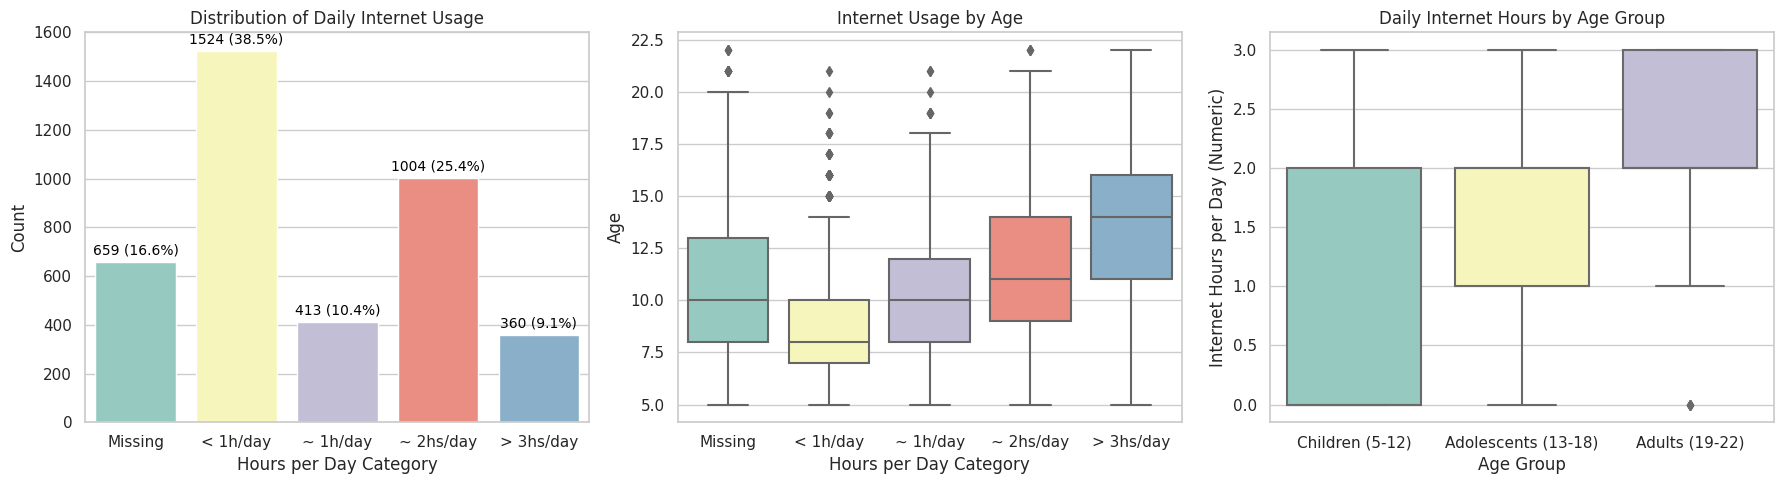

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distribution of internet usage hours
ax1 = sns.countplot(x='internet_use_category', data=train_data, palette="Set3", ax=axes[0])
axes[0].set_title('Distribution of Daily Internet Usage')
axes[0].set_xlabel('Hours per Day Category')
axes[0].set_ylabel('Count')

total = len(train_data['internet_use_category'])
for bar in ax1.patches:
    count = int(bar.get_height())
    pct = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({pct})', (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Plot internet usage hours by age
sns.boxplot(y=train_data['Basic_Demos-Age'], x=train_data['internet_use_category'], ax=axes[1], palette="Set3")
axes[1].set_title('Internet Usage by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Category')

# Plot numeric internet usage by age group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age_Group', data=train_data, ax=axes[2], palette="Set3")
axes[2].set_title('Daily Internet Hours by Age Group')
axes[2].set_ylabel('Internet Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

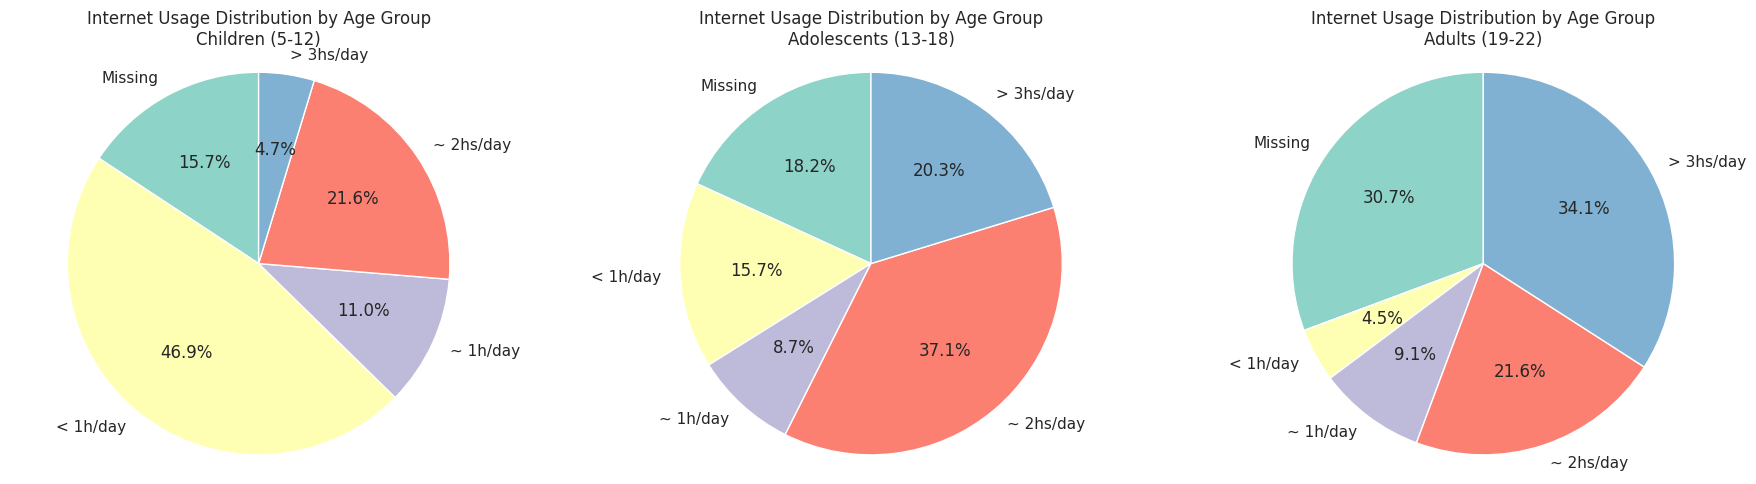

In [29]:
# Distribution of internet usage within each age group
usage_by_age_group = train_data.groupby(['Age_Group', 'internet_use_category']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(usage_by_age_group), figsize=(18, 5))

for idx, age_group in enumerate(usage_by_age_group.index):
    age_group_distribution = usage_by_age_group.loc[age_group] / usage_by_age_group.loc[age_group].sum()
    axes[idx].pie(
        age_group_distribution, labels=age_group_distribution.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1
    )
    axes[idx].set_title(f'Internet Usage Distribution by Age Group\n{age_group}')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

In [30]:
non_na_usage_data = train_data.dropna(subset=['PreInt_EduHx-computerinternet_hoursday'])
over_3_hours = (non_na_usage_data['PreInt_EduHx-computerinternet_hoursday'] == 3).sum()
print(f"Participants using Internet 3+ hours/day: {(over_3_hours / len(non_na_usage_data)) * 100:.2f}%")

less_than_1_hour = (non_na_usage_data['PreInt_EduHx-computerinternet_hoursday'] == 0).sum()
print(f"Participants using Internet 1 hour or less/day: {(less_than_1_hour / len(non_na_usage_data)) * 100:.2f}%")

Participants using Internet 3+ hours/day: 10.91%
Participants using Internet 1 hour or less/day: 46.17%


In [31]:
# Breakdown of internet usage by sex
usage_by_sex = train_data.groupby(['Basic_Demos-Sex', 'internet_use_category']).size().unstack(fill_value=0)
usage_by_sex_percent = usage_by_sex.div(usage_by_sex.sum(axis=1), axis=0) * 100

usage_by_sex_display = usage_by_sex.astype(str) + ' (' + usage_by_sex_percent.round(1).astype(str) + '%)'
usage_by_sex_display

internet_use_category,Missing,< 1h/day,~ 1h/day,~ 2hs/day,> 3hs/day
Basic_Demos-Sex,,,,,
Female,271 (18.4%),569 (38.6%),139 (9.4%),353 (23.9%),144 (9.8%)
Male,388 (15.6%),955 (38.4%),274 (11.0%),651 (26.2%),216 (8.7%)


In this analysis, we explore patterns of internet usage measured by PreInt_EduHx-computerinternet_hoursday across different demographic groups. This variable captures the daily internet use of participants, categorized into distinct usage levels.
* Data Completeness: Internet usage data is missing for approximately 16.6% of participants. Among those with data, 38.5% reported using the internet for less than an hour per day.
* Age-Based Analysis: The box plots reveal a pattern in daily internet usage relative to age. Higher daily usage levels tend to correlate with older participants, with clear trends observed for both categorical and numeric representations of internet usage. This linear relationship is also visually confirmed by the alignment of the pie charts across age groups, where older groups show a broader distribution across higher usage categories.
* Interaction Between Internet Use and Age: An interaction feature combining internet use and age could potentially improve model performance by capturing this observed trend.
* Sex-Based Differences: The breakdown of internet usage by sex shows minimal differences, suggesting that gender does not significantly impact daily internet usage patterns in this dataset.

In [32]:
sii_present_data = train_data[train_data['sii'] != "Missing"]
sii_present_data.loc[:, 'sii'] = sii_present_data['sii'].cat.remove_unused_categories()

In [33]:
sii_internet_counts = sii_present_data.groupby(['internet_use_category', 'sii']).size().unstack(fill_value=0)
sii_internet_percent = sii_internet_counts.div(sii_internet_counts.sum(axis=1), axis=0) * 100
sii_internet_summary = sii_internet_counts.astype(str) + ' (' + sii_internet_percent.round(1).astype(str) + '%)'
sii_internet_summary

sii,0 (None),1 (Mild),2 (Moderate),3 (Severe)
internet_use_category,,,,
Missing,52 (63.4%),15 (18.3%),15 (18.3%),0 (0.0%)
< 1h/day,933 (73.9%),247 (19.6%),78 (6.2%),5 (0.4%)
~ 1h/day,160 (47.2%),123 (36.3%),54 (15.9%),2 (0.6%)
~ 2hs/day,366 (47.2%),251 (32.3%),147 (18.9%),12 (1.5%)
> 3hs/day,75 (29.0%),86 (33.2%),83 (32.0%),15 (5.8%)


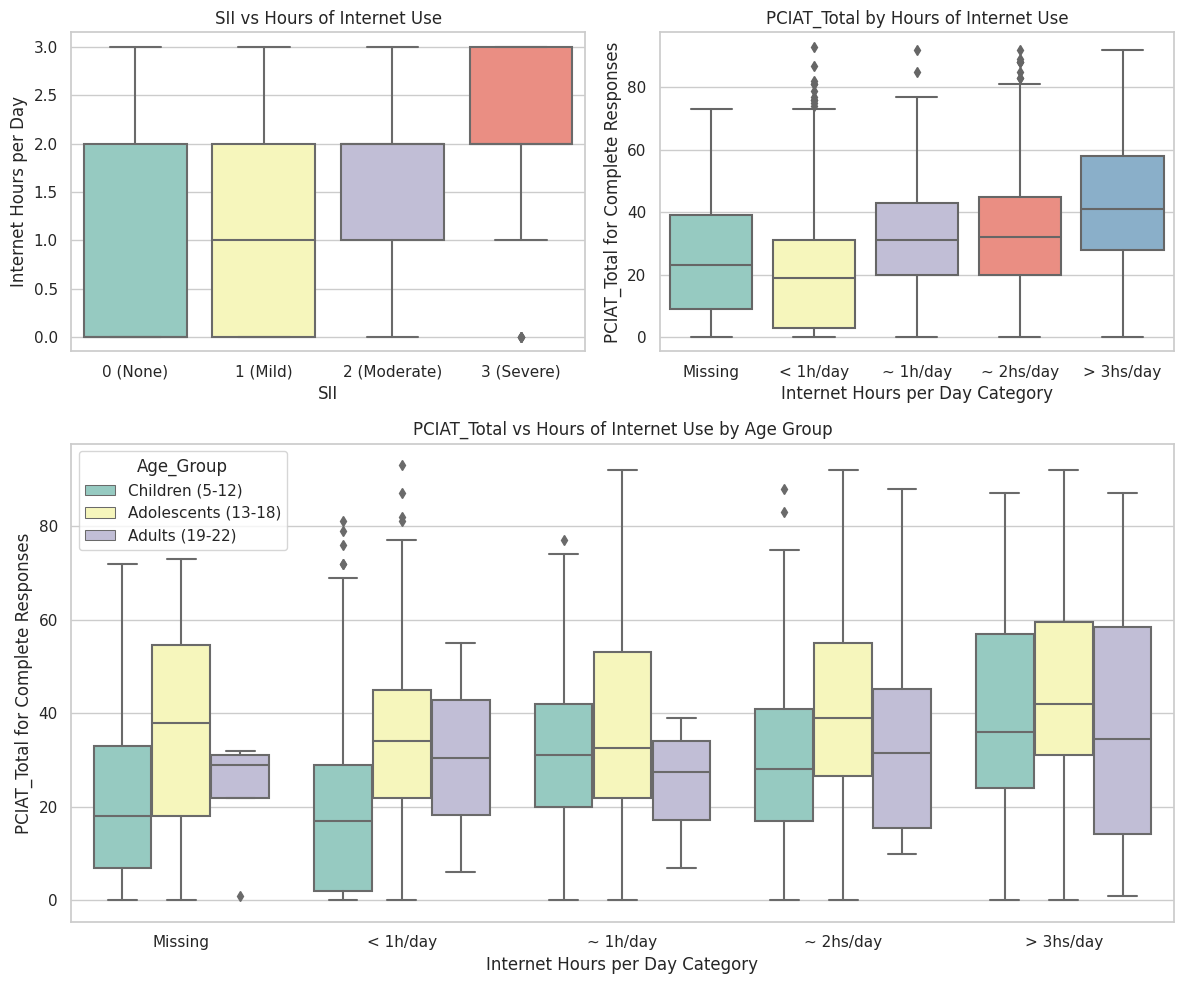

In [34]:
fig = plt.figure(figsize=(12, 10))
grid_spec = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# SII vs Hours of Internet Use
ax1 = fig.add_subplot(grid_spec[0, 0])
sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday', data=sii_present_data, ax=ax1, palette="Set3")
ax1.set_title('SII vs Hours of Internet Use')
ax1.set_ylabel('Internet Hours per Day')
ax1.set_xlabel('SII')

# PCIAT_Total for Complete Responses by Internet Usage
ax2 = fig.add_subplot(grid_spec[0, 1])
sns.boxplot(x='internet_use_category', y='total_full_responses', data=sii_present_data, palette="Set3", ax=ax2)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete Responses')
ax2.set_xlabel('Internet Hours per Day Category')

# SII vs Internet Use Hours by Age Group (spanning entire row)
ax3 = fig.add_subplot(grid_spec[1, :])
sns.boxplot(x='internet_use_category', y='total_full_responses', data=sii_present_data, hue='Age_Group', ax=ax3, palette="Set3")
ax3.set_title('PCIAT_Total vs Hours of Internet Use by Age Group')
ax3.set_ylabel('PCIAT_Total for Complete Responses')
ax3.set_xlabel('Internet Hours per Day Category')

plt.tight_layout()
plt.show()

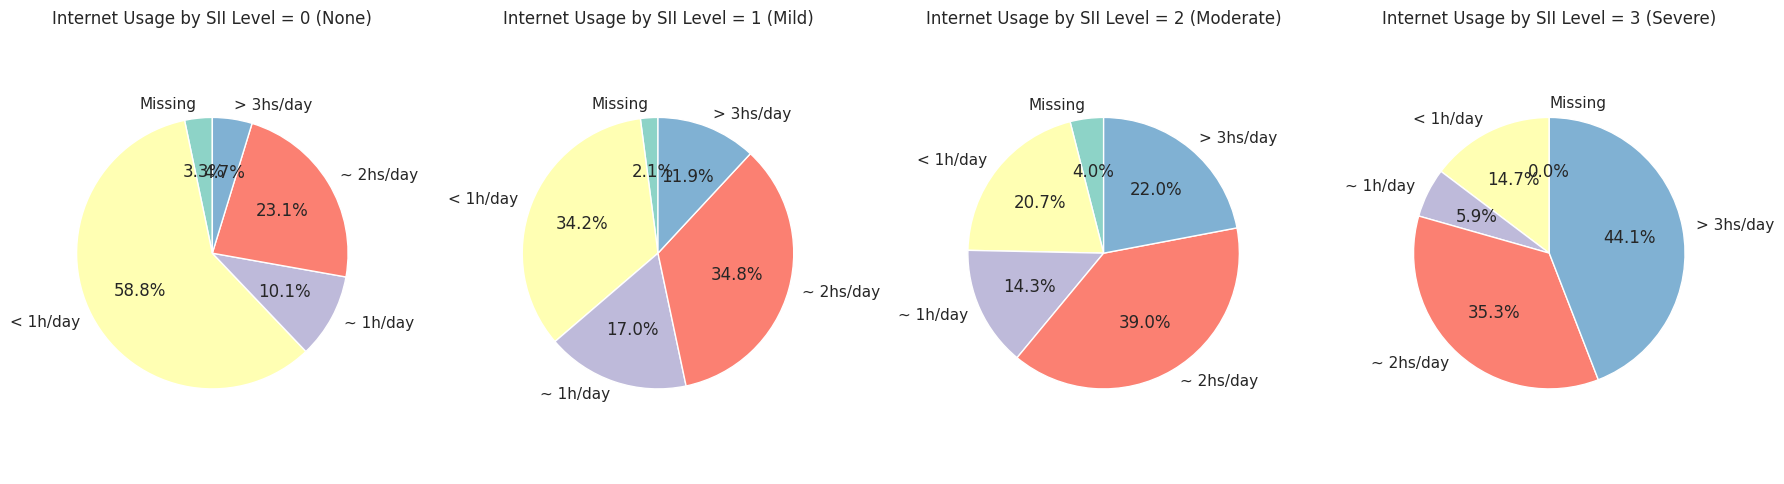

In [35]:
# Pie charts displaying SII by internet usage category
sii_usage_counts = sii_present_data.groupby(['sii', 'internet_use_category']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(sii_usage_counts), figsize=(18, 5))

for idx, sii_level in enumerate(sii_usage_counts.index):
    usage_distribution = sii_usage_counts.loc[sii_level] / sii_usage_counts.loc[sii_level].sum()
    axes[idx].pie(usage_distribution, labels=usage_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1)
    axes[idx].set_title(f'Internet Usage by SII Level = {sii_level}')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

In [36]:
age_stats_for_low_usage_high_sii = train_data[
    (train_data['internet_use_category'] == '< 1h/day') & 
    (train_data['sii'].isin(['2 (Moderate)', '3 (Severe)']))
]['Basic_Demos-Age'].describe()
age_stats_for_low_usage_high_sii

count    83.000000
mean     10.626506
std       3.083041
min       5.000000
25%       8.500000
50%      10.000000
75%      12.500000
max      21.000000
Name: Basic_Demos-Age, dtype: float64

Analysis of SII and Internet Usage Patterns

The analysis investigates how Problematic Internet Use (PIU) scores (SII) relate to daily internet usage across various demographic groups.
* SII vs. Hours of Internet Use: In the box plots, we observe a trend where participants with higher SII scores tend to report more daily internet usage. This aligns with expectations since excessive internet use is a primary aspect of PIU. However, despite this trend, there’s considerable overlap between usage levels across SII categories, suggesting that factors beyond time spent online may contribute to SII levels.
* Age-Based Trends in PIU (SII): When breaking down PCIAT_Total (the continuous PIU score) by both age group and internet use, adolescents emerge as the most affected group, particularly among higher internet usage levels. This observation highlights a non-linear relationship, where adolescents show elevated SII scores regardless of usage category, suggesting potential age-specific vulnerabilities to PIU.
* Participants with Low Internet Usage but High SII Scores: The pie charts reveal that a significant portion of participants—83 in total—spend less than an hour online daily yet still have high SII scores. Specifically, 20.7% of these participants are moderately impaired (SII 2), and 14.7% are severely impaired (SII 3). This suggests that factors other than daily internet usage may influence SII scores.

Summary of Findings

1. Age and SII Relationship: SII scores show a U-shaped relationship with age, with adolescents displaying the highest median PCIAT_Total. The results suggest that age may be a critical factor in PIU, with adolescents particularly affected across all usage levels.
2.	Linear Trend in Age and Internet Usage: A clear trend is observed where older participants report more time spent online. This increase aligns with higher SII levels, especially among adolescents.
3.	Complexity in PIU Factors: While higher SII scores generally correlate with more internet usage, adolescents show distinct susceptibility to PIU, indicating that developmental factors unique to this age group may play a role.
4.	High SII Scores Among Low Internet Users: Some participants, spanning nearly all age groups (ages 5 to 21), have high SII scores despite minimal internet usage, challenging the assumption that only high usage leads to PIU.

The observed relationship between SII and internet usage is multifaceted. Although excessive internet use typically aligns with PIU, factors beyond time online appear to impact SII. Notably, adolescents demonstrate the highest SII scores across all usage categories, raising questions about whether this group is more vulnerable to PIU or if the questionnaire itself is more sensitive to PIU symptoms in this demographic.

The PCIAT questionnaire, which informs SII, is structured to capture emotional and social impacts related to internet use, such as dependence, social isolation, and neglect of responsibilities. However, parental perceptions—shaped by cultural attitudes, personal biases, or expectations—can influence responses. Additionally, for certain age groups, such as young children or adults, specific questions may be less relevant, potentially skewing results. For example:
* Young children may not have household duties or academic responsibilities, and may lack exposure to email or online friendships, making these items less applicable.
* Adults, conversely, may not relate to questions about imposed internet limits.

These limitations question the construct validity of SII and whether it accurately captures PIU. This analysis suggests that SII might be reflecting a combination of age-specific behavioral factors and subjective biases rather than directly measuring problematic internet use.

### Features EDA by Groups

In [37]:
instrument_features = data_description.groupby('Instrument')['Field'].apply(list).to_dict()

for instrument_name, feature_list in instrument_features.items():
    print(f"{instrument_name}: {feature_list}\n")

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score']

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

Identifier: ['id']

Internet Use: ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

P

In [38]:
season_columns = [column for column in train_data.columns if 'Season' in column]
season_data = train_data[season_columns]
season_data

,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season
0,Fall,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall
1,Summer,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer
2,Summer,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer
3,Winter,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter
4,Spring,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3955,Fall,Spring,Fall,NaN,Fall,Fall,NaN,Winter,Winter,Winter,Fall
3956,Winter,NaN,Spring,NaN,Spring,Spring,NaN,Winter,NaN,NaN,Winter
3957,Fall,Spring,Winter,NaN,Winter,Winter,NaN,Winter,Winter,Winter,Fall
3958,Spring,Spring,Winter,NaN,Spring,Summer,NaN,Spring,Spring,Spring,Spring


In [39]:
train_data[season_columns] = train_data[season_columns].fillna("Missing")

Potential Connection to Problematic Internet Use (PIU)

Behavioral (Subjective Reports):
1. Internet Usage: Since PIU depends on internet engagement, we might expect PreInt_EduHx-computerinternet_hoursday (daily internet use) to be a primary predictor. However, as shown in prior analysis, its relationship with PIU can be complex and non-linear.
2. Behavioral Traits: Behavioral tendencies linked to PIU may manifest in self-reported physical activity scores (PAQ_A-PAQ_A_Total and PAQ_C-PAQ_C_Total). However, because these are self-reported, biases and inaccuracies could introduce noise, potentially weakening their predictive power.

Physical Health and Fitness (Objective Measurements):
1. General Functioning: The Children’s Global Assessment Scale (CGAS-CGAS_Score), a clinician-rated measure of general functioning, might help illustrate how PIU affects overall functioning, particularly for individuals deeply impacted by PIU.
2.	Physical Health Metrics: Body composition and vital signs (fields beginning with Physical-) could indicate how PIU impacts general health. While height alone might not be a strong predictor, combining height with weight to calculate BMI could provide insights into body composition as it relates to PIU.
3.	Body Composition (Bio-electrical Impedance Analysis): This method captures body composition metrics like body fat, muscle mass, and metabolic rate. If PIU correlates with sedentary behavior, it could manifest in these variables (e.g., lower bone density, reduced lean muscle mass, poor hydration, or higher body fat percentages).
4.	Objective Physical Activity Measures (FitnessGram): Fitness assessments (Fitness_ and FGC-FGC_ columns) cover endurance, flexibility, and muscle strength, which might reveal PIU’s impact on physical fitness, particularly muscle strength and tonus.
5.	Sleep Patterns: Sleep assessments (SDS-SDS_Total_Raw and SDS-SDS_Total_T) could show how PIU disrupts sleep, as heavy internet use often correlates with sleep issues.

Demographic Features:
1. Age and Gender: These demographic variables could be crucial, given the distinct age-related and possibly gender-specific patterns in internet use and PIU (as observed previously). Different age groups, particularly adolescents, may be especially vulnerable to PIU, and gender might further modulate these patterns.

In [40]:
# Removing target-related columns and continuing EDA by examining feature groups
filtered_data_dict = data_description[data_description['Instrument'] != 'Parent-Child Internet Addiction Test']
numeric_columns = filtered_data_dict[filtered_data_dict['Type'].str.contains('float|int', case=False)]['Field'].tolist()

In [41]:
instrument_features.get('Demographics', [])

['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

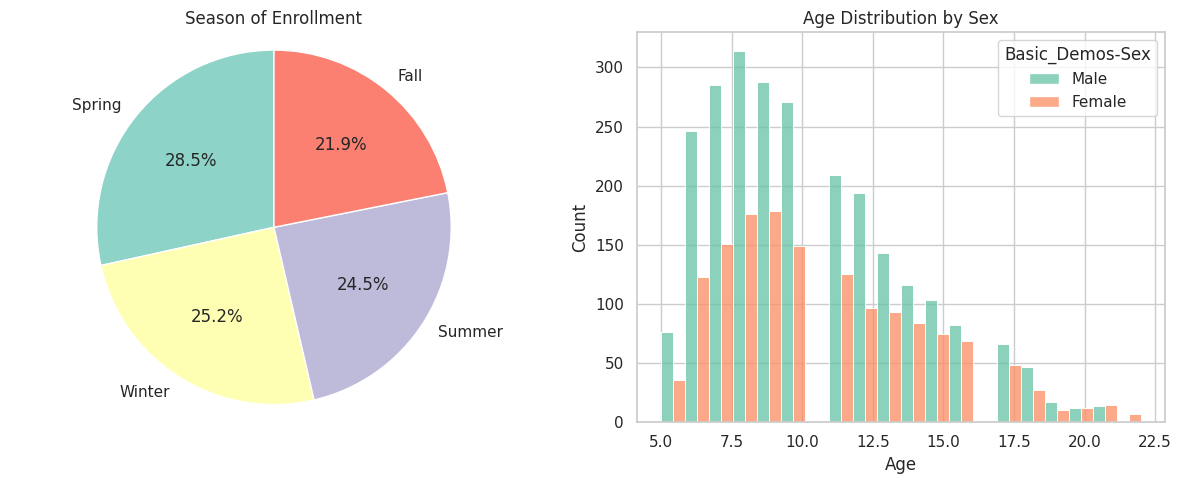

In [42]:
# Visualizations for season of enrollment and age distribution by sex
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Season of Enrollment
enrollment_season_counts = train_data['Basic_Demos-Enroll_Season'].value_counts(dropna=False)
axes[0].pie(
    enrollment_season_counts, labels=enrollment_season_counts.index,
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3")
)
axes[0].set_title('Season of Enrollment')
axes[0].axis('equal')

# Age Distribution by Sex
sns.histplot(
    data=train_data, x='Basic_Demos-Age',
    hue='Basic_Demos-Sex', multiple='dodge',
    palette="Set2", bins=20, ax=axes[1]
)
axes[1].set_title('Age Distribution by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [43]:
generate_summary(train_data, 'Basic_Demos-Age')

,count,mean,std,min,25%,50%,75%,max,missing
Basic_Demos-Age,,,,,,,,,
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.0,10.0,13.0,22.0,0


* Seasonal Enrollment Patterns: Enrollment by season is relatively even, with the highest proportion in Spring (28.5%) and the lowest in Fall (21.9%). This seasonal variation may reflect specific program timelines or regional enrollment trends.
* Age and Gender Distribution: Males (coded as 0) represent a larger portion across most age groups, with fewer females (coded as 1), particularly in younger demographics. This skew may influence certain age-related findings and should be considered in further analysis.
* Target Variable Insights by Age and Gender: Previously, in the ‘SII by Age and Sex’ analysis, no significant differences were found between males and females regarding SII scores. However, a U-shaped relationship between age and PIU impairment was observed, with adolescents showing heightened susceptibility to PIU. This relationship underscores the importance of age in predicting PIU risk.

#### **Children's Global Assessment Scale**

In [44]:
instrument_features.get("Children's Global Assessment Scale", [])

['CGAS-Season', 'CGAS-CGAS_Score']

In [45]:
cgas_data = train_data[train_data['CGAS-CGAS_Score'].notnull()]
age_range = cgas_data['Basic_Demos-Age']
print(
    f"Age range for participants with CGAS-CGAS_Score data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with CGAS-CGAS_Score data: 5 - 22 years


In [46]:
generate_summary(train_data, 'CGAS-CGAS_Score')

,count,mean,std,min,25%,50%,75%,max,missing
CGAS-CGAS_Score,,,,,,,,,
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.0,65.0,75.0,999.0,1539


In [47]:
train_data[train_data['CGAS-CGAS_Score'] > 100]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,total_full_responses,Age_Group,internet_use_category
2065,83525bbe,Fall,11,Female,Winter,999.0,Fall,NaN,NaN,NaN,...,NaN,Missing,NaN,NaN,Fall,3.0,Missing,NaN,Children (5-12),> 3hs/day


There is one extreme value outlier (CGAS-CGAS_Score = 999), which is obviously an error.

In [48]:
train_data.loc[train_data['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

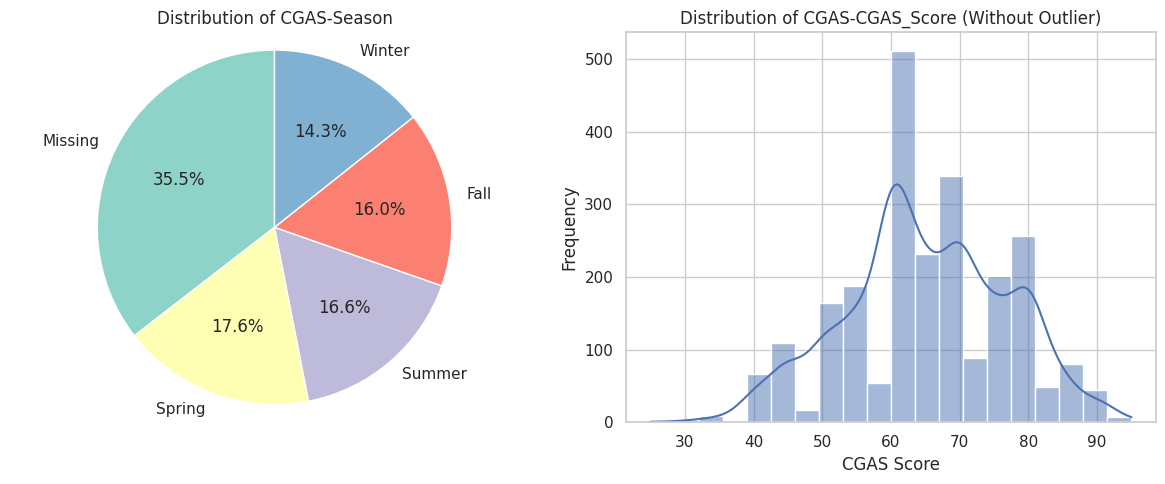

In [49]:
plt.figure(figsize=(12, 5))

# Distribution of CGAS-Season
plt.subplot(1, 2, 1)
cgas_season_distribution = train_data['CGAS-Season'].value_counts(normalize=True)
plt.pie(
    cgas_season_distribution, 
    labels=cgas_season_distribution.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('Distribution of CGAS-Season')
plt.axis('equal')

# Histogram of CGAS-CGAS_Score without outliers
plt.subplot(1, 2, 2)
sns.histplot(
    train_data['CGAS-CGAS_Score'].dropna(),
    bins=20, kde=True
)
plt.title('Distribution of CGAS-CGAS_Score (Without Outlier)')
plt.xlabel('CGAS Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [50]:
generate_summary(train_data, 'CGAS-CGAS_Score')

,count,mean,std,min,25%,50%,75%,max,missing
CGAS-CGAS_Score,,,,,,,,,
CGAS-CGAS_Score,2420.0,65.069008,11.78731,25.0,59.0,65.0,75.0,95.0,1540


#### CGAS Interpretation

The Children’s Global Assessment Scale (CGAS) evaluates general functioning in children and adolescents aged 4 to 16. Clinicians assign a CGAS score from 1 to 100, focusing on the child’s lowest level of functioning over a specific time frame, irrespective of any treatment or expected outcomes. This score provides a snapshot of overall well-being, capturing how various factors—including behavioral and psychological issues—affect day-to-day functioning.

Given that CGAS measures general functioning and SII reflects the degree of impairment due to internet use, CGAS likely plays a pivotal role in predicting SII. When combined with internet usage data, CGAS can highlight the potential broader impacts of PIU on physical and psychological health.

To proceed, we will categorize the CGAS-CGAS_Score based on established scoring tiers to better understand the distribution across functional levels and assess patterns related to PIU. This binned approach will allow for more detailed insights into the relationship between CGAS and SII.

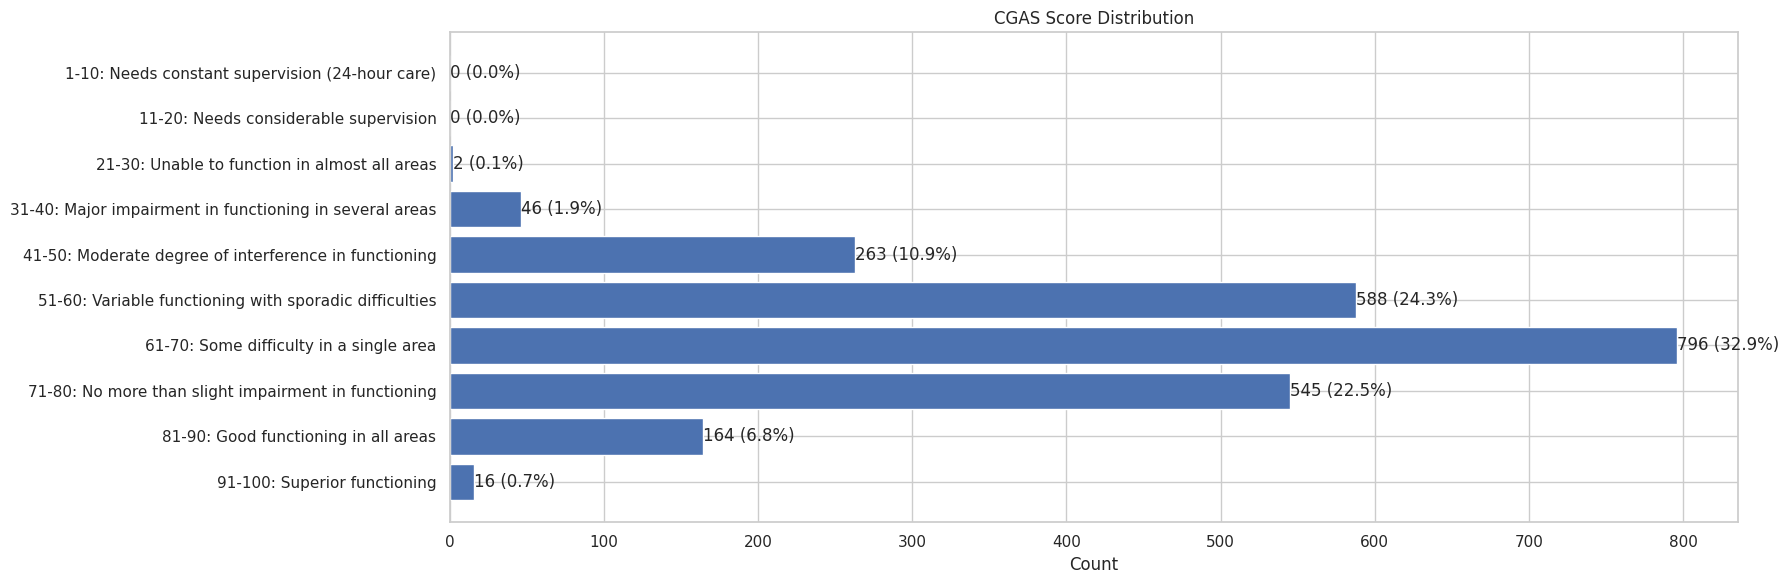

In [51]:
bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24-hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

train_data['CGAS_Score_Bin'] = pd.cut(train_data['CGAS-CGAS_Score'], bins=bins, labels=labels)

cgas_counts = train_data['CGAS_Score_Bin'].value_counts().reindex(labels)
cgas_percent = (cgas_counts / cgas_counts.sum() * 100).round(1)
count_percent_labels = cgas_counts.astype(str) + " (" + cgas_percent.astype(str) + "%)"

# Plot CGAS Score Distribution
plt.figure(figsize=(18, 6))
bars = plt.barh(labels, cgas_counts)
plt.xlabel('Count')
plt.title('CGAS Score Distribution')

for bar, label in zip(bars, count_percent_labels):
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2, label, va='center'
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


* The majority of individuals have CGAS scores between 51-80 (79.7%), i.e. sporadic difficulties to only slight impairments
* Two participants have extreme difficulty in functioning

In [52]:
filtered_train = train_data.dropna(subset=['CGAS_Score_Bin', 'total_full_responses'])
filtered_train.loc[:, 'CGAS_Score_Bin'] = filtered_train['CGAS_Score_Bin'].cat.remove_unused_categories()
filtered_train.loc[:, 'sii'] = filtered_train['sii'].cat.remove_unused_categories()
len(filtered_train)

2288

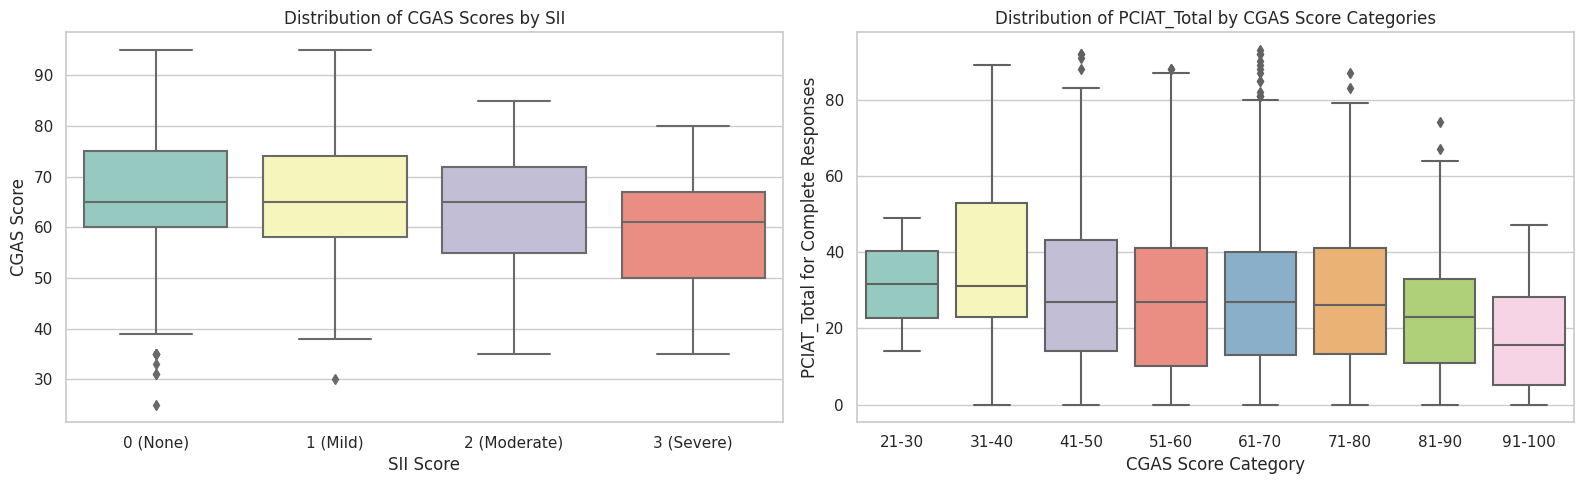

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# CGAS Score by SII Level
sns.boxplot(data=filtered_train, x='sii', y='CGAS-CGAS_Score', palette='Set3', ax=axes[0])
axes[0].set_xlabel('SII Score')
axes[0].set_ylabel('CGAS Score')
axes[0].set_title('Distribution of CGAS Scores by SII')

# PCIAT_Total by CGAS Score Categories
sns.boxplot(data=filtered_train, x='CGAS_Score_Bin', y='total_full_responses', ax=axes[1], palette='Set3')

range_labels = [label.split(":")[0] for label in filtered_train['CGAS_Score_Bin'].cat.categories]
axes[1].set_xticklabels(range_labels)

axes[1].set_xlabel('CGAS Score Category')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_title('Distribution of PCIAT_Total by CGAS Score Categories')

plt.tight_layout()
plt.show()

In [54]:
score_range_by_sii = train_data.groupby('sii')['CGAS-CGAS_Score'].agg(['min', 'max'])
score_range_by_sii = score_range_by_sii.rename(columns={'min': 'Minimum CGAS Score', 'max': 'Maximum CGAS Score'})
score_range_by_sii

,Minimum CGAS Score,Maximum CGAS Score
sii,,
Missing,40.0,85.0
0 (None),25.0,95.0
1 (Mild),30.0,95.0
2 (Moderate),35.0,85.0
3 (Severe),35.0,80.0


Let's check the SII and Internet usage data for the participants with the worst global functioning:

In [55]:
train_data[train_data['CGAS-CGAS_Score'] < 35][['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii', 'CGAS-CGAS_Score', 'PreInt_EduHx-computerinternet_hoursday']]

,Basic_Demos-Age,Basic_Demos-Sex,sii,CGAS-CGAS_Score,PreInt_EduHx-computerinternet_hoursday
2417,9,Female,0 (None),31.0,0.0
2525,13,Female,1 (Mild),30.0,0.0
2555,15,Male,0 (None),33.0,2.0
3332,12,Male,0 (None),25.0,2.0
3858,15,Male,0 (None),31.0,3.0


And the same for the participants with the best global functioning:

In [56]:
train_data[train_data['CGAS-CGAS_Score'] > 90][['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii', 'CGAS-CGAS_Score', 'PreInt_EduHx-computerinternet_hoursday']]

,Basic_Demos-Age,Basic_Demos-Sex,sii,CGAS-CGAS_Score,PreInt_EduHx-computerinternet_hoursday
310,13,Female,0 (None),91.0,2.0
591,10,Female,0 (None),93.0,NaN
667,13,Male,0 (None),95.0,0.0
910,10,Female,0 (None),91.0,0.0
1007,14,Male,1 (Mild),95.0,0.0
1157,14,Female,1 (Mild),91.0,2.0
1640,11,Female,0 (None),92.0,0.0
2342,6,Female,0 (None),91.0,0.0
2668,14,Female,0 (None),92.0,0.0
2675,11,Male,0 (None),91.0,0.0


Insights from the Children’s Global Assessment Scale (CGAS) and SII

* CGAS Scores by SII Levels: As expected, participants with higher SII scores tend to have lower CGAS scores, reflecting a slight decrease in general functioning with more severe PIU. However, this decrease is modest, showing only a subtle association between higher PIU severity and CGAS scores.
* Absence of High Functioning in Severe PIU Cases: Notably, none of the participants with the highest SII score (3, indicating severe PIU) fall within the highest CGAS categories (81–100), which represent good to superior functioning. This may indicate that PIU negatively impacts overall health and well-being, as reflected in parental assessments on the PCIAT.
* Wide Range of CGAS Scores Among Low SII Participants: Participants with low or moderate SII (0 or 1) display a wide range of CGAS scores, from very low (significant impairment) to high (good functioning). This suggests that, for some, poor general functioning is unrelated to PIU. Variations in CGAS scores within these lower SII groups indicate that PIU is not the sole determinant of a child’s or adolescent’s well-being, and other health factors might be influencing their CGAS.
* Challenges in Drawing Consistent Conclusions: The high variability in CGAS scores within each SII level complicates efforts to establish a clear, consistent relationship between CGAS and SII. Additionally, smaller sample sizes within certain CGAS categories limit the generalizability of these findings and might introduce bias into the analysis.

#### **Physical Measures**

In [57]:
instrument_features.get('Physical Measures', [])

['Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

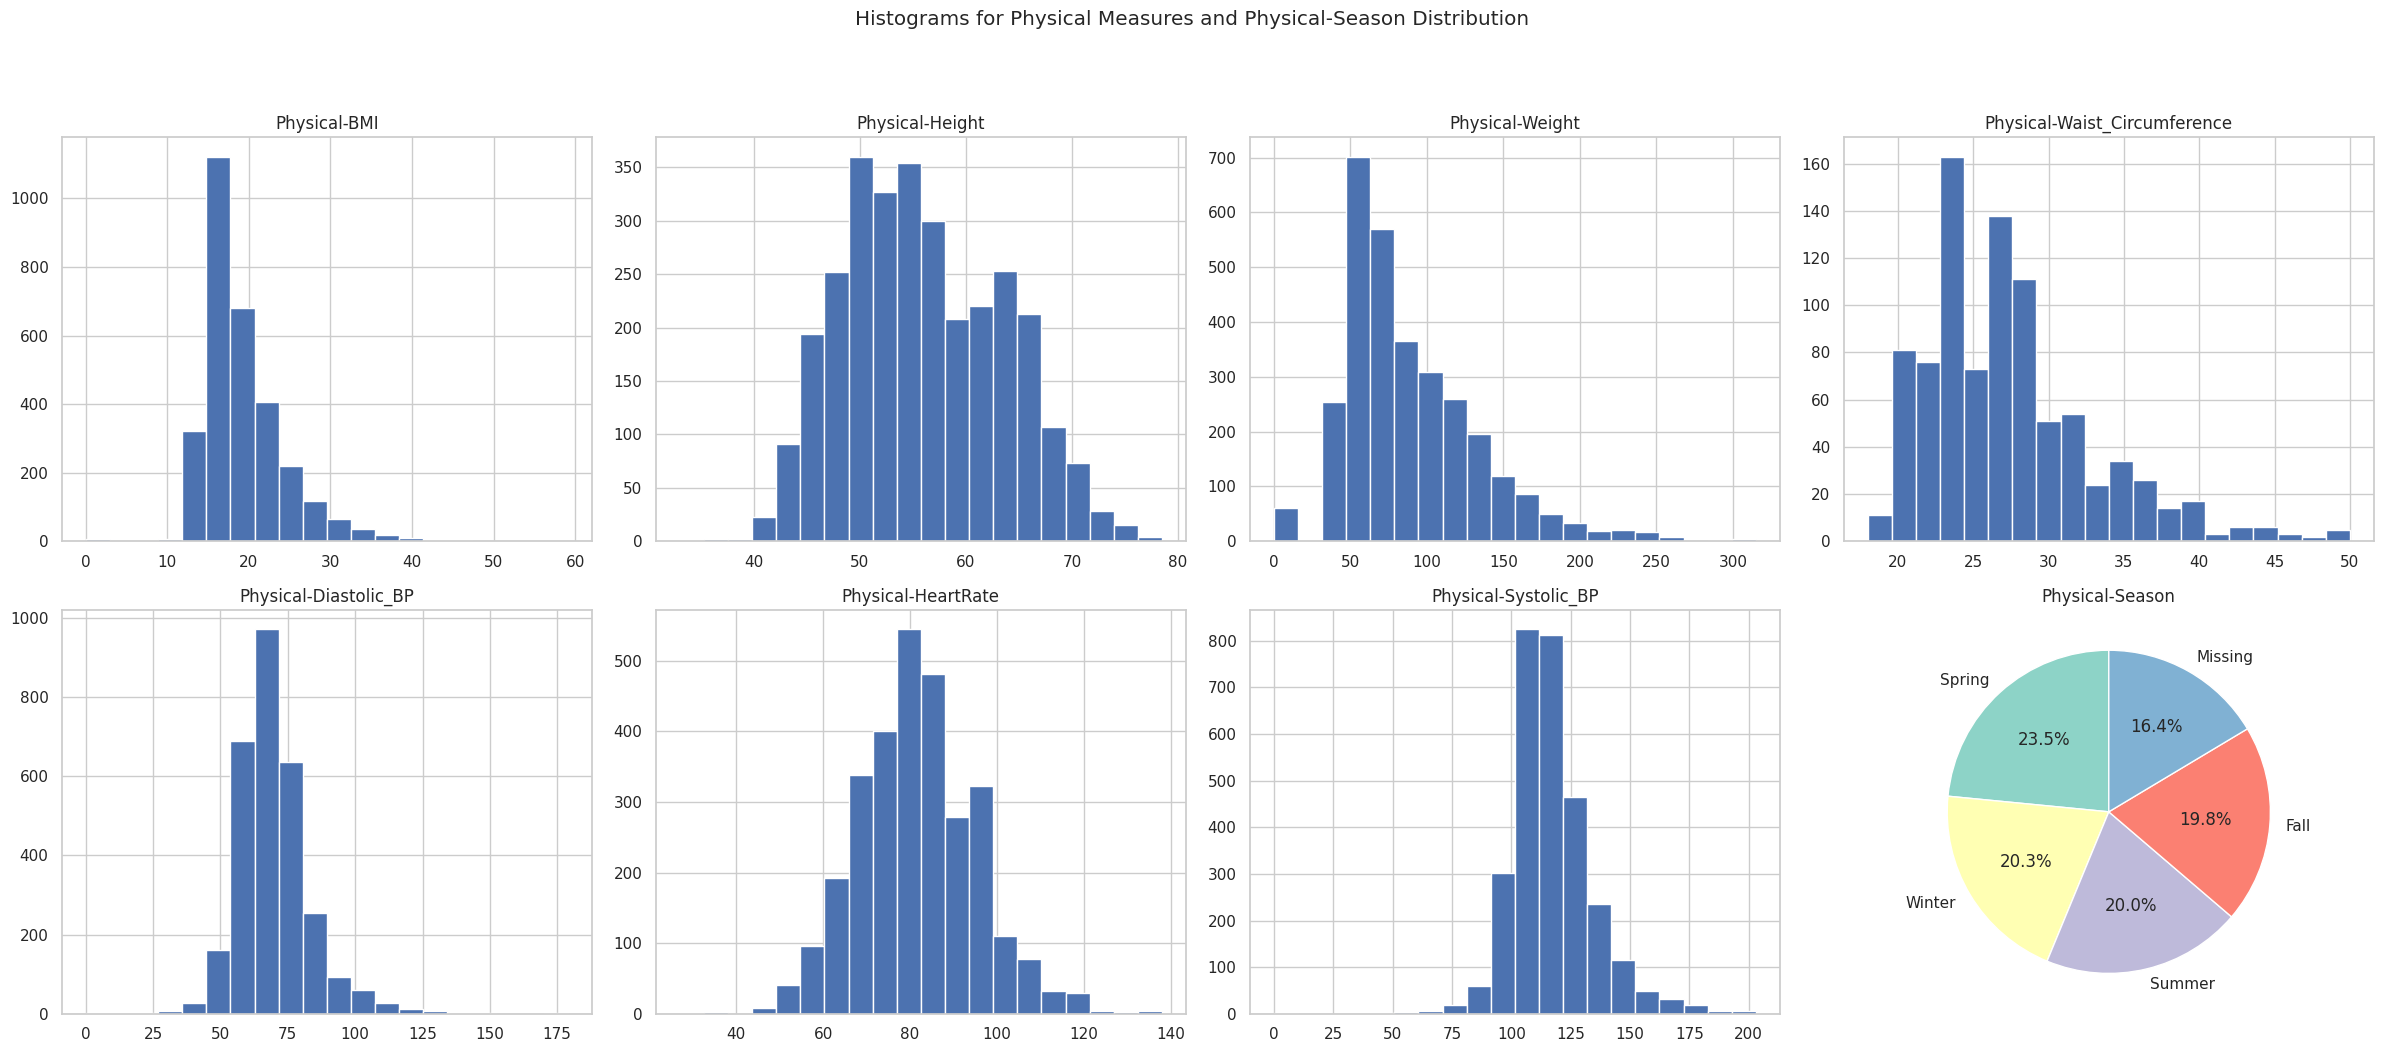

In [58]:
features_physical = instrument_features.get('Physical Measures', [])
physical_columns = [col for col in features_physical if col in numeric_columns]

# Plot histograms for each continuous physical measure and a pie chart for Physical-Season
plt.figure(figsize=(24, 10))
n_cols = 4
n_rows = len(physical_columns) // n_cols + 1

for i, col in enumerate(physical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    train_data[col].hist(bins=20)
    plt.title(col)

# Physical-Season distribution
plt.subplot(n_rows, n_cols, len(physical_columns) + 1)
season_distribution = train_data['Physical-Season'].value_counts(dropna=False)
plt.pie(
    season_distribution,
    labels=season_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('Physical-Season')

plt.suptitle('Histograms for Physical Measures and Physical-Season Distribution', y=1.05)
plt.tight_layout()
plt.show()

In [59]:
generate_summary(train_data, physical_columns)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048,938
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000,933
Physical-Weight,3076.0,89.038615,44.569040,0.0,57.20000,77.000000,113.800000,315.000000,884
Physical-Waist_Circumference,898.0,27.278508,5.567287,18.0,23.00000,26.000000,30.000000,50.000000,3062
Physical-Diastolic_BP,2954.0,69.648951,13.611226,0.0,61.00000,68.000000,76.000000,179.000000,1006
Physical-HeartRate,2967.0,81.597236,13.665196,27.0,72.00000,81.000000,90.500000,138.000000,993
Physical-Systolic_BP,2954.0,116.983074,17.061225,0.0,107.00000,114.000000,125.000000,203.000000,1006


**Weight and Height**

In [60]:
wh_columns = ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference']

In [61]:
(train_data[wh_columns] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 61
Physical-Waist_Circumference     0
dtype: int64

Replace the 0 values by NaN and check the stats again:

In [62]:
train_data[wh_columns] = train_data[wh_columns].replace(0, np.nan)
generate_summary(train_data, wh_columns)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3015.0,19.376812,5.034191,8.522436,15.890526,17.950925,21.588631,59.132048,945
Physical-Height,3027.0,55.946713,7.473764,33.000000,50.000000,55.000000,62.000000,78.500000,933
Physical-Weight,3015.0,90.840060,43.161374,31.800000,58.200000,77.800000,114.300000,315.000000,945
Physical-Waist_Circumference,898.0,27.278508,5.567287,18.000000,23.000000,26.000000,30.000000,50.000000,3062


Convert weight to kilograms, and height to centimeters and recalculate BMI:

In [63]:
lbs_to_kg = 0.453592
inches_to_cm = 2.54

train_data['Physical-Weight'] = train_data['Physical-Weight'] * lbs_to_kg
train_data['Physical-Height'] = train_data['Physical-Height'] * inches_to_cm
train_data['Physical-Waist_Circumference'] = train_data['Physical-Waist_Circumference'] * inches_to_cm

# Recalculate BMI based on metric weight and height
train_data['Physical-BMI'] = np.where(
    train_data['Physical-Weight'].notna() & train_data['Physical-Height'].notna(),
    train_data['Physical-Weight'] / ((train_data['Physical-Height'] / 100) ** 2),
    np.nan
)

generate_summary(train_data, wh_columns)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,3015.0,19.378674,5.034658,8.523273,15.892086,17.952687,21.590750,59.137852,945
Physical-Height,3027.0,142.104651,18.983360,83.820000,127.000000,139.700000,157.480000,199.390000,933
Physical-Weight,3015.0,41.204324,19.577654,14.424226,26.399054,35.289458,51.845566,142.881480,945
Physical-Waist_Circumference,898.0,69.287410,14.140909,45.720000,58.420000,66.040000,76.200000,127.000000,3062


A lot of values seem to be out of normal ranges... especially max values of weight (142kg) and waist circumference (127cm).

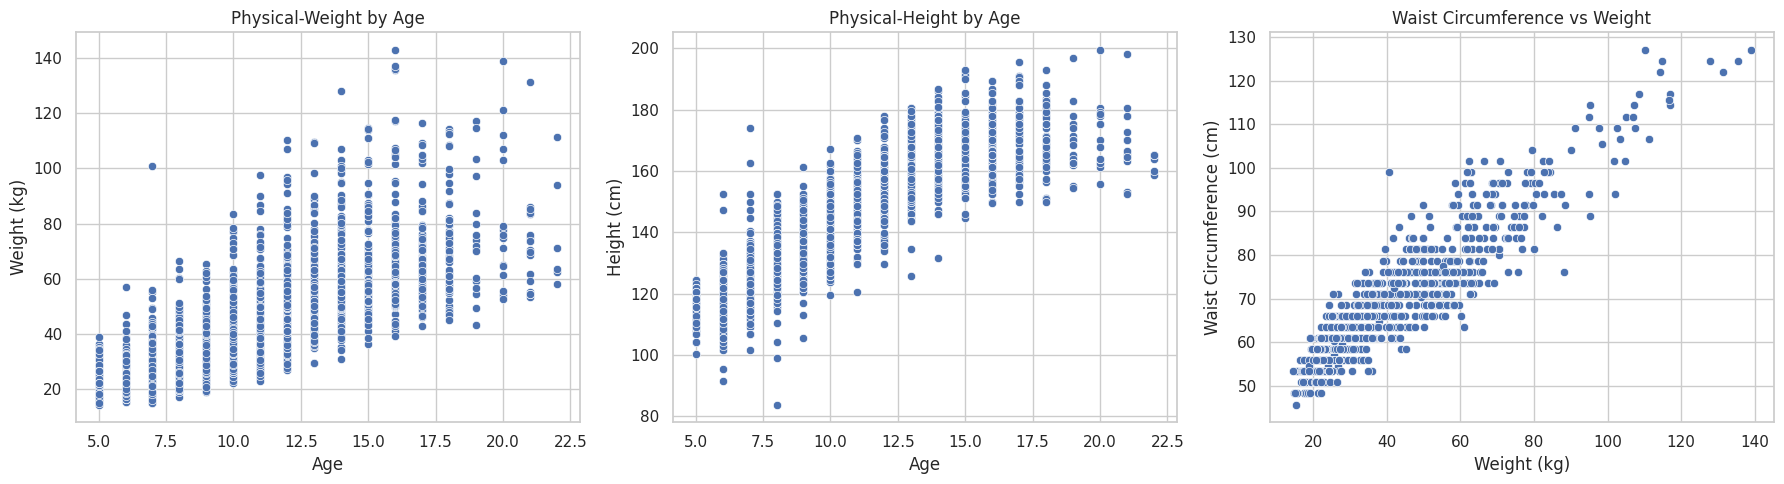

In [64]:
plt.figure(figsize=(18, 5))

# Plot Physical-Weight by Age
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train_data)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Plot Physical-Height by Age
plt.subplot(1, 3, 2)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train_data)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

# Plot Physical-Waist_Circumference vs Physical-Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train_data)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Waist Circumference (cm)')

plt.tight_layout()
plt.show()

* Trends in Physical Measures: As anticipated, weight and height tend to increase with age, reflecting expected developmental growth patterns. Additionally, there is a strong correlation between waist circumference and weight, supporting the view that these physical measures are related.
* Outliers and Unusual Measurements: There are several individuals with atypical measurements, such as unusually tall stature for their age group or extreme weight values. Additionally, certain waist circumference values appear anomalous—for instance, a measurement of 100 cm paired with a weight of only 40 kg. These outliers could stem from data entry errors, unique health conditions, or genuine variations.
* Challenges in Data Cleaning: The data cleaning process is complicated by the fact that it’s not always clear which data points might be inaccurate. For example:
    * A combination of a waist circumference of 100 cm and a weight of 40 kg could indicate an error in either waist circumference or weight.
    * An unusually tall height of 175 cm for a 7-year-old may result from an entry mistake, or it could reflect a rare health condition like gigantism.

**Blood Pressure & Heart Rate**

In [65]:
bp_hr_columns = [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]

In [66]:
(train_data[bp_hr_columns] < 50).sum()

Physical-Diastolic_BP    88
Physical-Systolic_BP      2
Physical-HeartRate       12
dtype: int64

We also know that systolic BP cannot be lower than diastolic BP:

In [67]:
train_data[train_data['Physical-Systolic_BP'] <= train_data['Physical-Diastolic_BP']][bp_hr_columns]

,Physical-Diastolic_BP,Physical-Systolic_BP,Physical-HeartRate
1140,179.0,139.0,103.0
1879,117.0,114.0,114.0
2386,76.0,76.0,116.0
3199,0.0,0.0,NaN
3344,98.0,73.0,96.0


These are certainly incorrect measurements. But again, we can't be sure which information is correct, so we can either flag these rows for further manual inspection one by one, or replace all suspicious values with NaN. For this analysis I only remove 0 values and both BP if systolic is lower or equal to diastolic.

In [68]:
train_data[physical_columns] = train_data[physical_columns].replace(0, np.nan)
train_data.loc[train_data['Physical-Systolic_BP'] <= train_data['Physical-Diastolic_BP'], bp_hr_columns] = np.nan

**Blood Pressure vs Heart Rate**

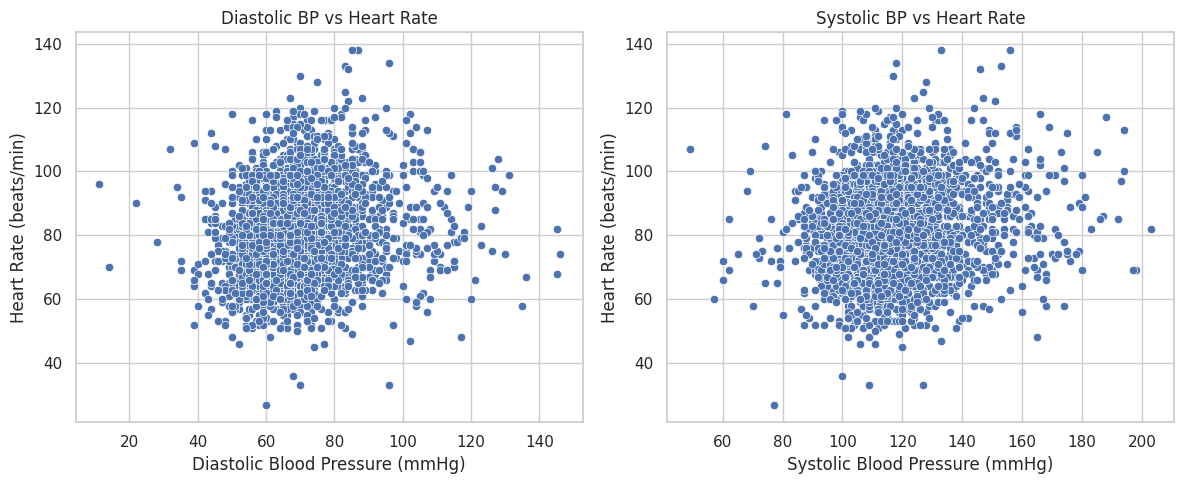

In [69]:
plt.figure(figsize=(12, 5))

# Diastolic BP vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-HeartRate', data=train_data)
plt.title('Diastolic BP vs Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart Rate (beats/min)')

# Systolic BP vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-HeartRate', data=train_data)
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart Rate (beats/min)')

plt.tight_layout()
plt.show()

The scatter plots reveal that heart rate and blood pressure (both systolic and diastolic) lack a strong correlation, suggesting that measurements may have been taken under resting or non-stressful conditions, where these metrics typically stabilize.

**Blood pressure vs Body Mass Index (BMI)**

Typically, systolic (SBP) and diastolic (DBP) blood pressure are positively correlated, as they both reflect the functioning of the cardiovascular system. However, there can be deviations:

* Isolated Systolic Hypertension: High SBP with normal DBP
* Isolated Diastolic Hypertension: Normal SBP with high DBP
* General Hypertension: Both SBP and DBP are elevated

BMI is often used as an indicator of overall body fat and can correlate with blood pressure (e.g. higher BMI values indicating overweight or obesity are commonly associated with elevated blood pressure). Let's see if this is true for the study participants.

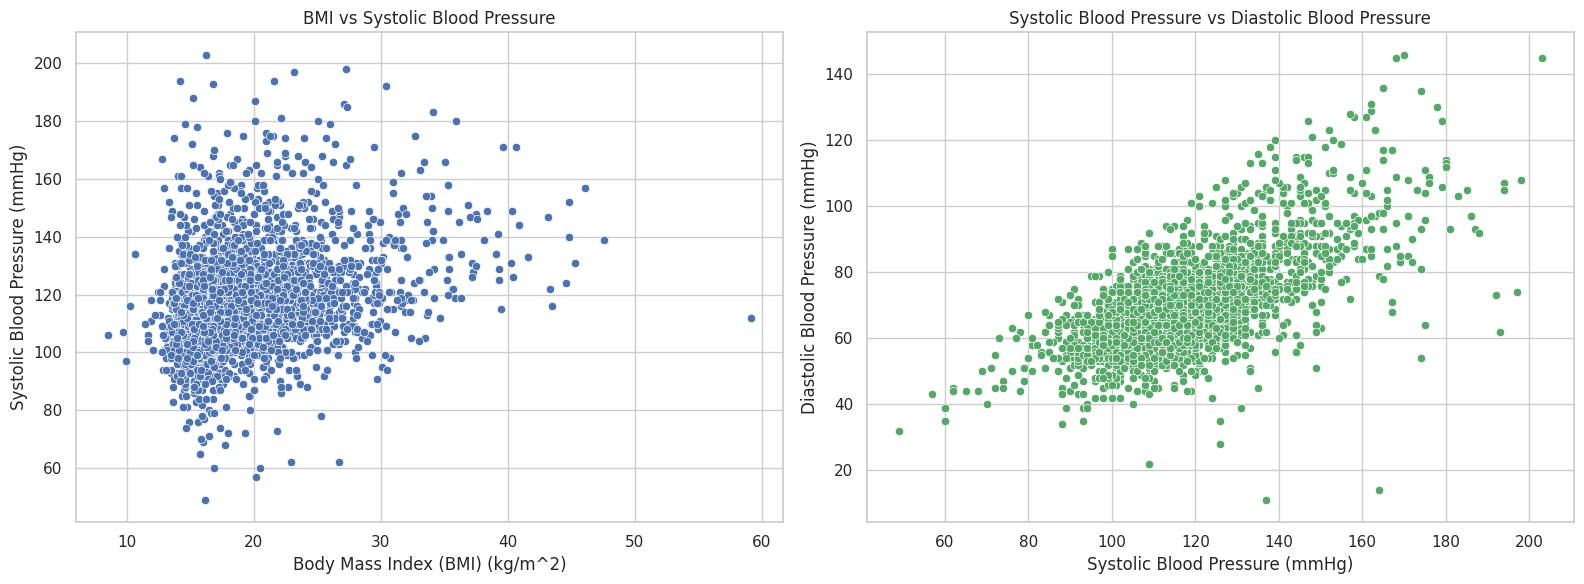

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BMI vs Systolic Blood Pressure
sns.scatterplot(x='Physical-BMI', y='Physical-Systolic_BP', data=train_data, ax=axes[0], color='b')
axes[0].set_title('BMI vs Systolic Blood Pressure')
axes[0].set_xlabel('Body Mass Index (BMI) (kg/m^2)')
axes[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Systolic vs Diastolic Blood Pressure
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-Diastolic_BP', data=train_data, ax=axes[1], color='g')
axes[1].set_title('Systolic Blood Pressure vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

There does not appear to be a strong, clear correlation between body mass index (BMI) and systolic blood pressure (BP).

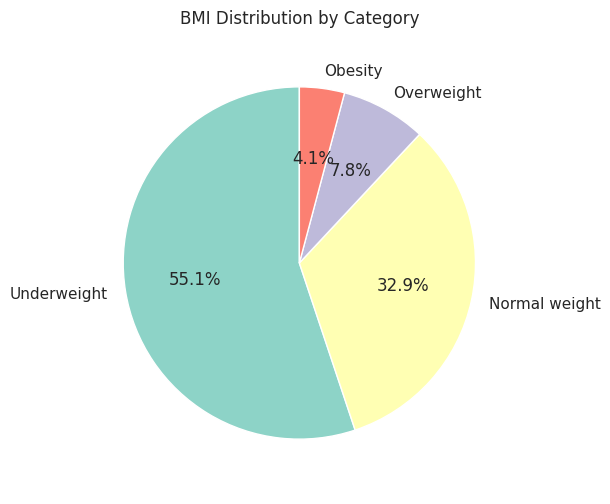

In [71]:
bmi_categories = [
    ('Underweight', train_data['Physical-BMI'] < 18.5),
    ('Normal weight', (train_data['Physical-BMI'] >= 18.5) & (train_data['Physical-BMI'] <= 24.9)),
    ('Overweight', (train_data['Physical-BMI'] >= 25) & (train_data['Physical-BMI'] <= 29.9)),
    ('Obesity', train_data['Physical-BMI'] >= 30)
]
bmi_category_counts = {label: condition.sum() for label, condition in bmi_categories}

# Plot BMI distribution across categories
plt.figure(figsize=(5, 6))
plt.pie(bmi_category_counts.values(), labels=bmi_category_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('BMI Distribution by Category')
plt.axis('equal')
plt.show()

In [72]:
# Check extreme deviations cases
train_data[train_data['Physical-BMI'] < 12][physical_columns + ['Basic_Demos-Age']].sort_values(by='Physical-BMI')

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Basic_Demos-Age
2848,8.523273,149.860,19.141582,NaN,68.0,77.0,106.0,8
1952,9.694718,149.860,21.772416,NaN,64.0,86.0,107.0,7
3463,9.960144,152.400,23.133192,NaN,48.0,73.0,97.0,6
3324,10.282698,147.320,22.316726,NaN,72.0,72.0,116.0,6
1707,10.676487,162.560,28.213422,NaN,99.0,90.0,134.0,7
3143,11.468414,131.318,19.776611,NaN,59.0,77.0,110.0,8
1700,11.676989,167.005,32.567906,NaN,50.0,90.0,106.0,10
3636,11.713943,139.700,22.861037,NaN,58.0,99.0,104.0,7
1307,11.750716,112.522,14.877818,48.26,NaN,77.0,NaN,7
156,11.916424,149.860,26.761928,71.12,76.0,83.0,118.0,11


In [73]:
train_data[train_data['Physical-Systolic_BP'] > 160][physical_columns + ['Basic_Demos-Age']].sort_values(by='Physical-Systolic_BP')

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Basic_Demos-Age
1794,14.036968,121.920,20.865232,NaN,111.0,69.0,161.0,8
284,21.719865,152.527,50.530149,NaN,96.0,99.0,161.0,12
3032,14.272220,129.540,23.949658,NaN,104.0,89.0,161.0,9
2401,17.245599,129.540,28.939170,NaN,87.0,103.0,161.0,8
882,16.398111,124.460,25.401152,NaN,127.0,95.0,161.0,6
...,...,...,...,...,...,...,...,...
1019,14.172653,124.460,21.953853,60.96,107.0,113.0,194.0,8
2777,21.625191,134.620,39.190349,NaN,105.0,100.0,194.0,7
2549,23.154916,169.926,66.859461,NaN,74.0,69.0,197.0,17
436,27.260353,175.260,83.733083,NaN,108.0,69.0,198.0,19


* A significant number of participants, especially for BMI and blood pressure, fall outside the expected normal ranges
* Most participants' heights and weights are within reasonable ranges, but many have BMIs outside the approximate normal range, suggesting that many participants may have disproportionate body proportions (or incorrect measurements?). For a more accurate understanding, age-specific reference values need to be used.

**Relationships with the target variable (PCIAT_Total for complete PCIAT responses)**

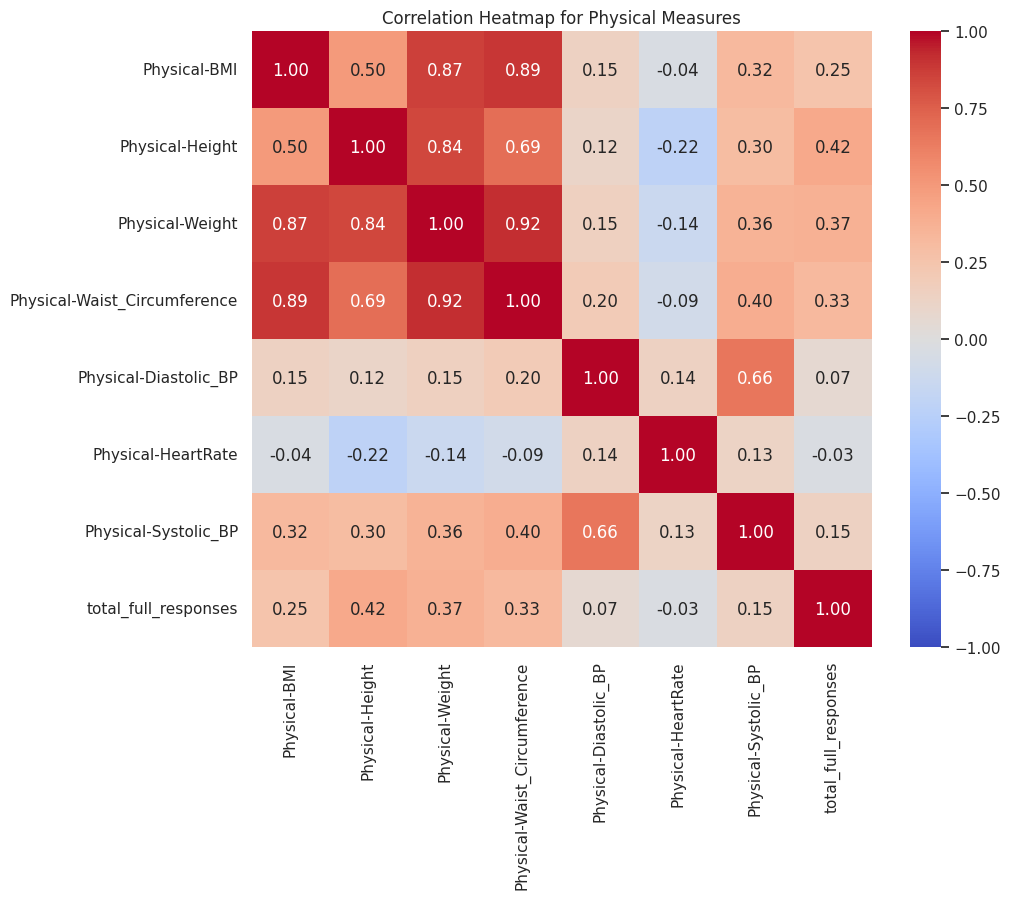

In [74]:
data_subset = train_data[physical_columns + ['total_full_responses']]
correlation_matrix = data_subset.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Physical Measures')
plt.show()

Insights from Correlation Analysis of Physical Measures and SII

* Positive Correlations with SII: Height, weight, and waist circumference show a positive correlation with the target variable (SII). This suggests that individuals with higher values in these physical measures tend to have a higher SII score. However, given that these physical attributes typically increase with age, this correlation likely reflects age-related trends rather than a direct link between body size and PIU. Essentially, these measures may be acting as proxies for age, aligning with the observed pattern where SII peaks in adolescence.
* Cardiovascular Measures: Systolic blood pressure, diastolic blood pressure, and heart rate also change with age, but they tend to stabilize more in adolescence compared to physical growth measures. These cardiovascular parameters show weaker correlations with SII, possibly due to their limited sensitivity to behavioral factors like internet use. Additionally, cardiovascular data often exhibit high variability, as observed in previous scatterplots, which could further dilute any potential link with PIU.

**Bio-electric Impedance Analysis**

In [75]:
bia_data_dict = data_description[data_description['Instrument'] == 'Bio-electric Impedance Analysis']
bia_data_dict

,Instrument,Field,Description,Type,Values,Value Labels
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
34,Bio-electric Impedance Analysis,BIA-BIA_Activity_Level_num,Activity Level,categorical int,"1,2,3,4,5","1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=..."
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content,float,NaN,NaN
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index,float,NaN,NaN
37,Bio-electric Impedance Analysis,BIA-BIA_BMR,Basal Metabolic Rate,float,NaN,NaN
38,Bio-electric Impedance Analysis,BIA-BIA_DEE,Daily Energy Expenditure,float,NaN,NaN
39,Bio-electric Impedance Analysis,BIA-BIA_ECW,Extracellular Water,float,NaN,NaN
40,Bio-electric Impedance Analysis,BIA-BIA_FFM,Fat Free Mass,float,NaN,NaN
41,Bio-electric Impedance Analysis,BIA-BIA_FFMI,Fat Free Mass Index,float,NaN,NaN
42,Bio-electric Impedance Analysis,BIA-BIA_FMI,Fat Mass Index,float,NaN,NaN


In [76]:
bia_data_dict = data_description[data_description['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()

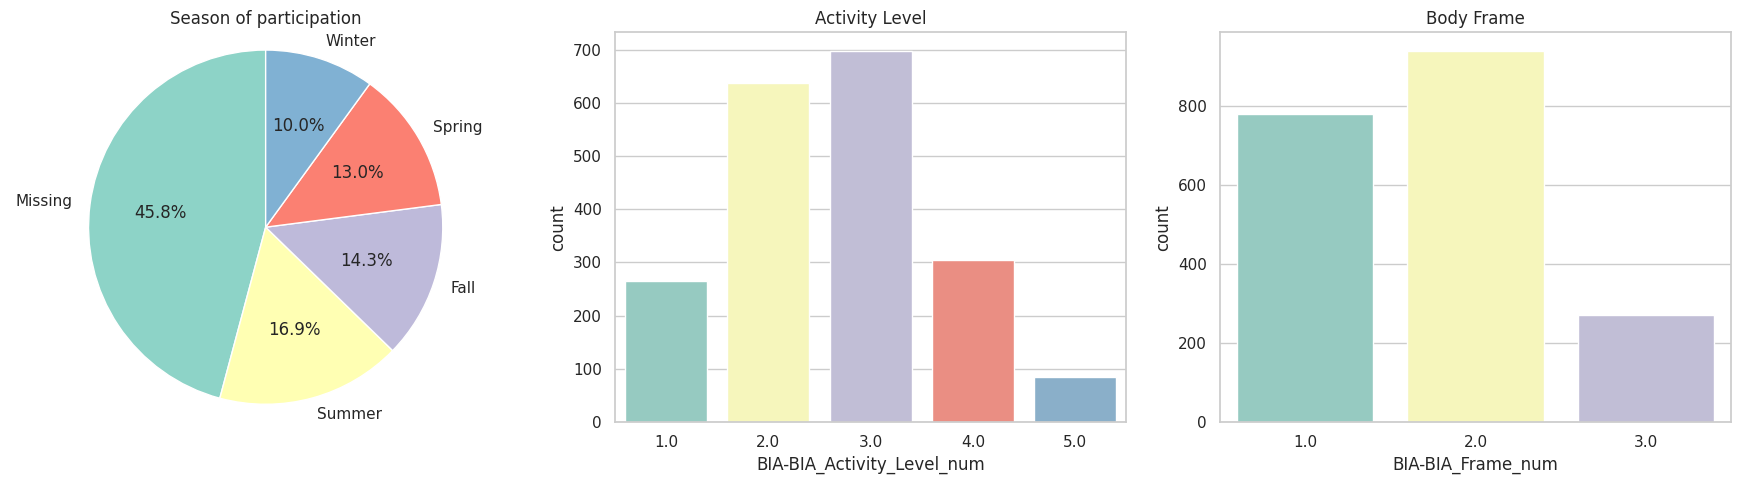

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BIA Season Distribution
season_distribution = train_data['BIA-Season'].value_counts(normalize=True)
axes[0].pie(
    season_distribution, 
    labels=season_distribution.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
axes[0].set_title(
    f"{bia_data_dict[bia_data_dict['Field'] == 'BIA-Season']['Description'].values[0]}"
)
axes[0].axis('equal')

# Plot counts for other categorical BIA variables
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train_data, palette="Set3", ax=axes[idx + 1])
    axes[idx + 1].set_title(bia_data_dict[bia_data_dict['Field'] == col]['Description'].values[0])

plt.tight_layout()
plt.show()

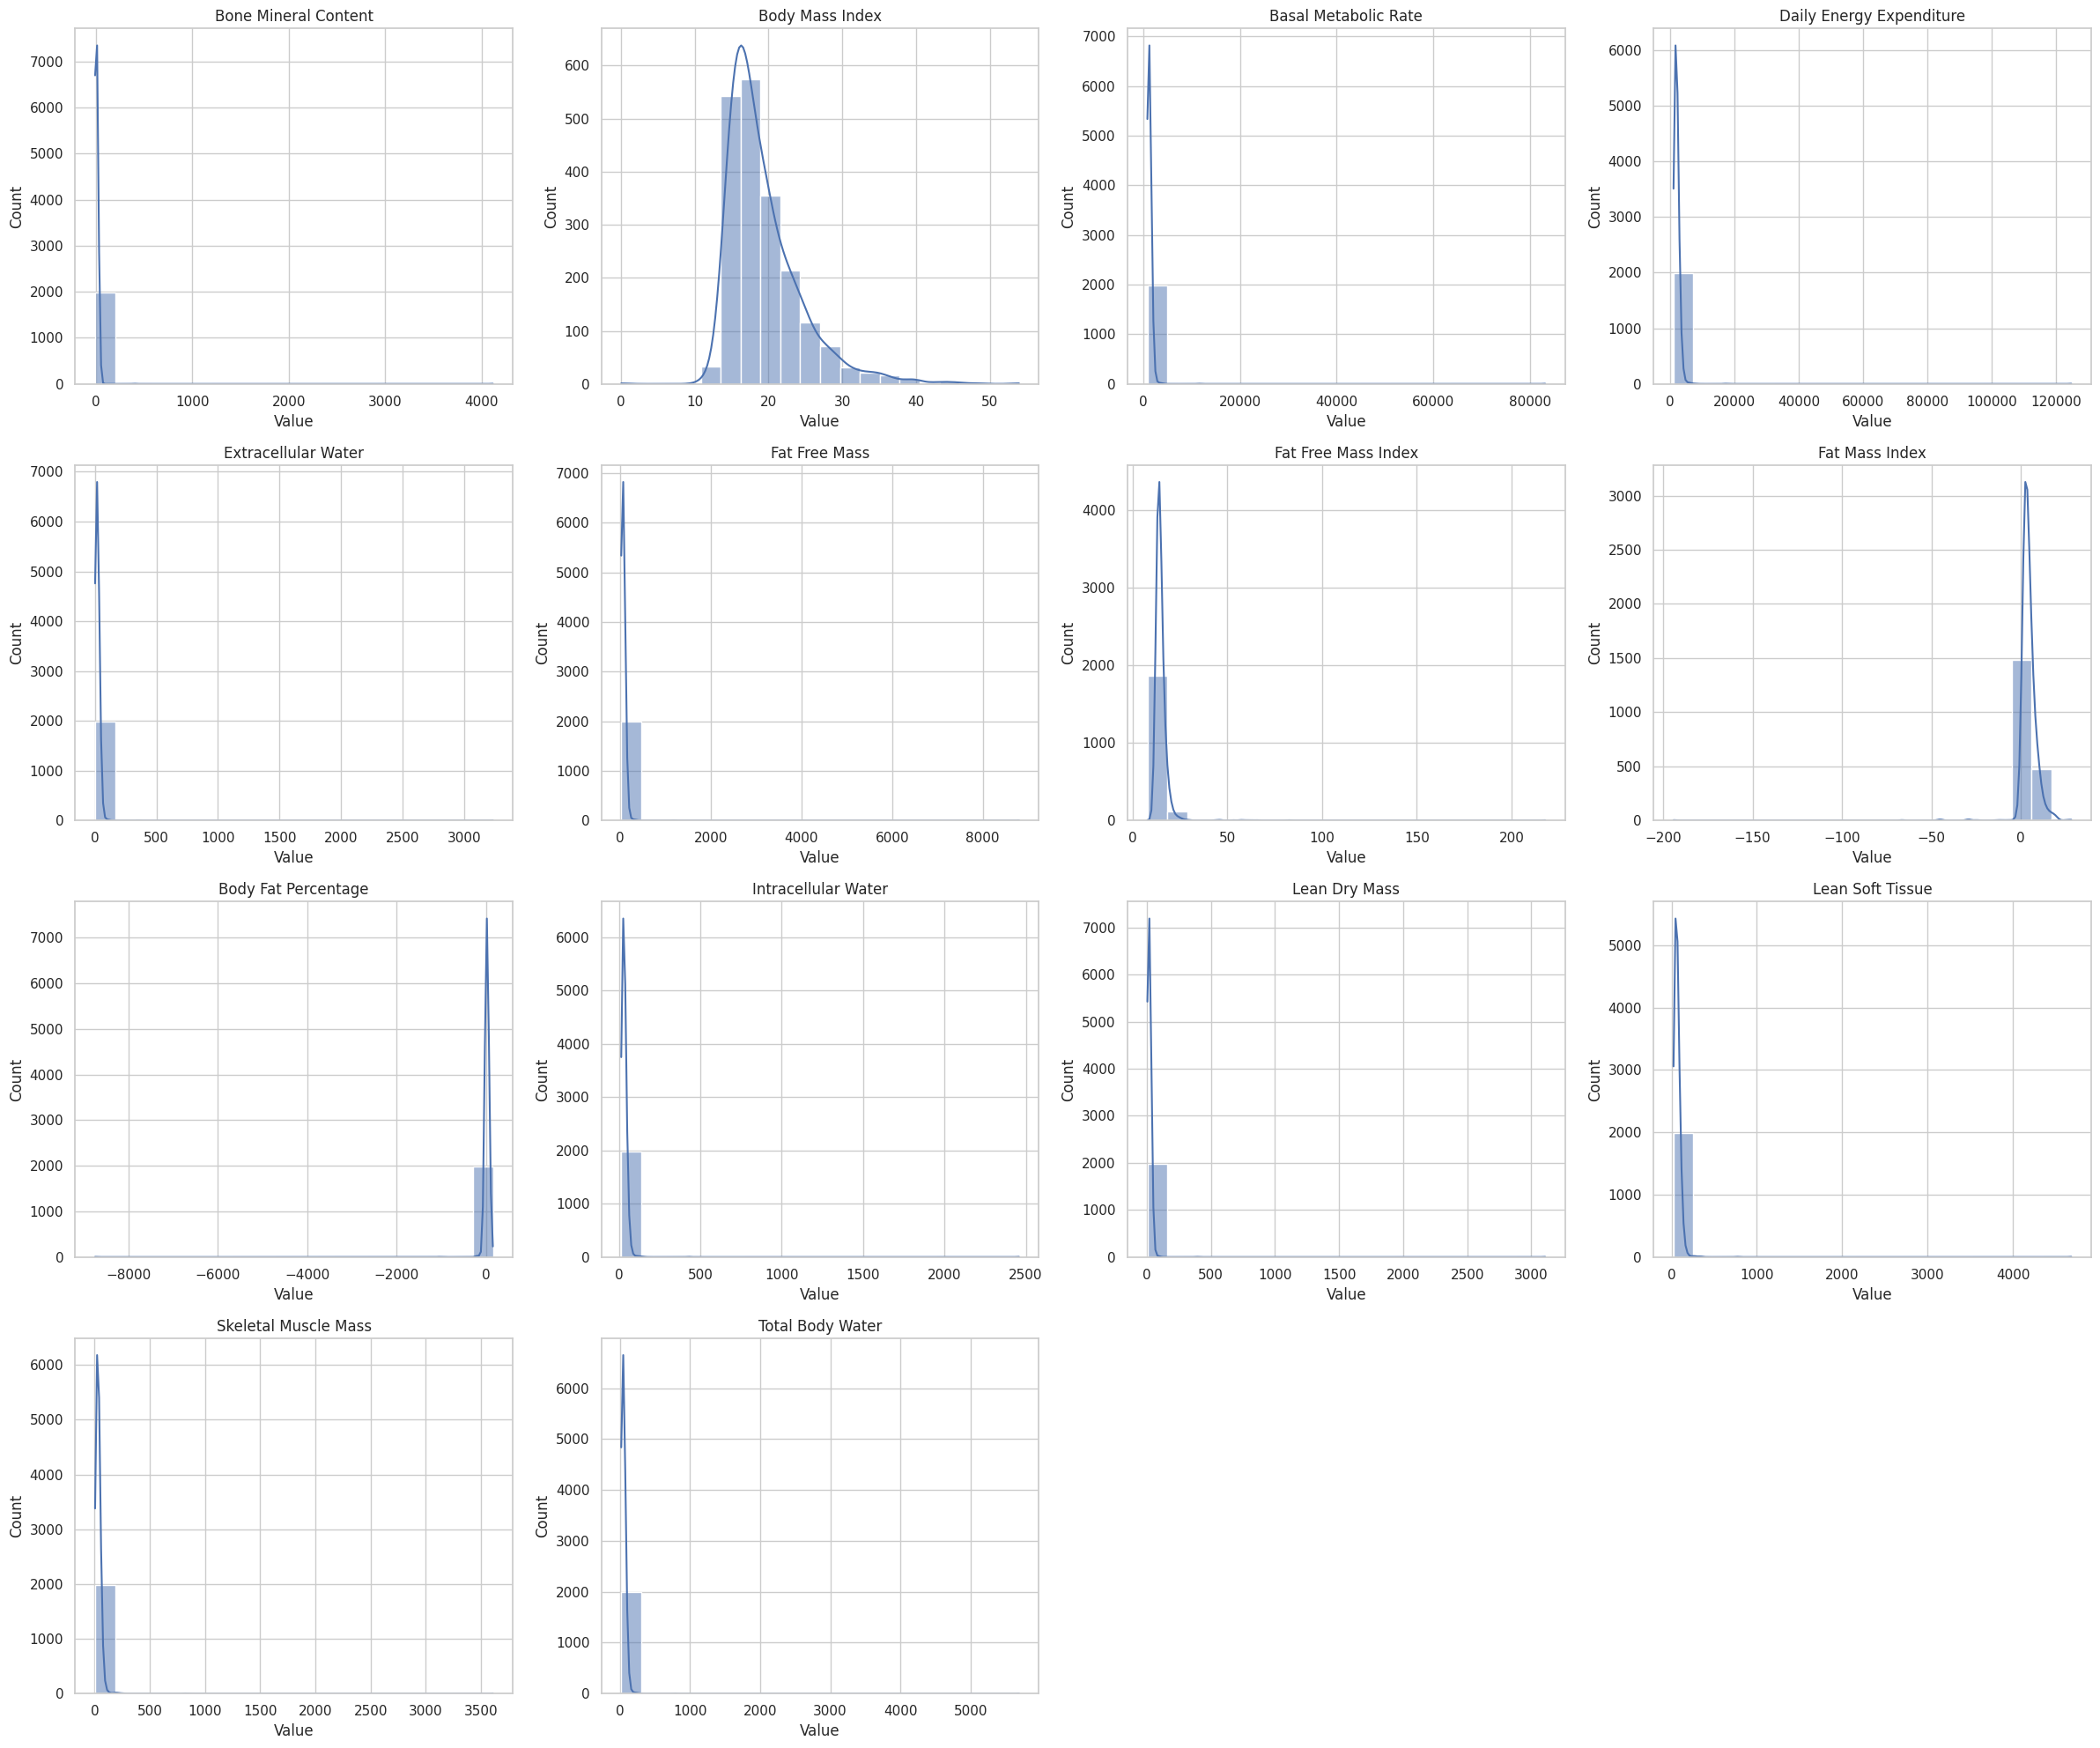

In [78]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train_data[col].dropna(), bins=20, kde=True)
    plt.title(bia_data_dict[bia_data_dict['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [79]:
generate_summary(train_data, continuous_columns)

,count,mean,std,min,25%,50%,75%,max,missing
BIA-BIA_BMC,1991.0,6.719826,92.586325,-7.789610,2.966905,3.92272,5.460925,4115.3600,1969
BIA-BIA_BMI,1991.0,19.367048,5.047848,0.048267,15.913600,17.96650,21.461100,53.9243,1969
BIA-BIA_BMR,1991.0,1237.018187,1872.383246,813.397000,1004.710000,1115.38000,1310.360000,83152.2000,1969
BIA-BIA_DEE,1991.0,2064.693747,2836.246272,1073.450000,1605.785000,1863.98000,2218.145000,124728.0000,1969
BIA-BIA_ECW,1991.0,20.825346,73.266287,1.789450,11.109550,15.92800,25.162200,3233.0000,1969
BIA-BIA_FFM,1991.0,74.021708,199.433753,28.900400,49.278100,61.06620,81.833800,8799.0800,1969
BIA-BIA_FFMI,1991.0,15.030554,5.792505,7.864850,13.408000,14.09250,15.430950,217.7710,1969
BIA-BIA_FMI,1991.0,4.336495,6.356402,-194.163000,2.306915,3.69863,5.987690,28.2515,1969
BIA-BIA_Fat,1991.0,16.855020,199.372119,-8745.080000,8.602395,16.17460,30.273100,153.8200,1969
BIA-BIA_ICW,1991.0,33.173380,56.272346,14.489000,24.463500,28.85580,35.475700,2457.9100,1969


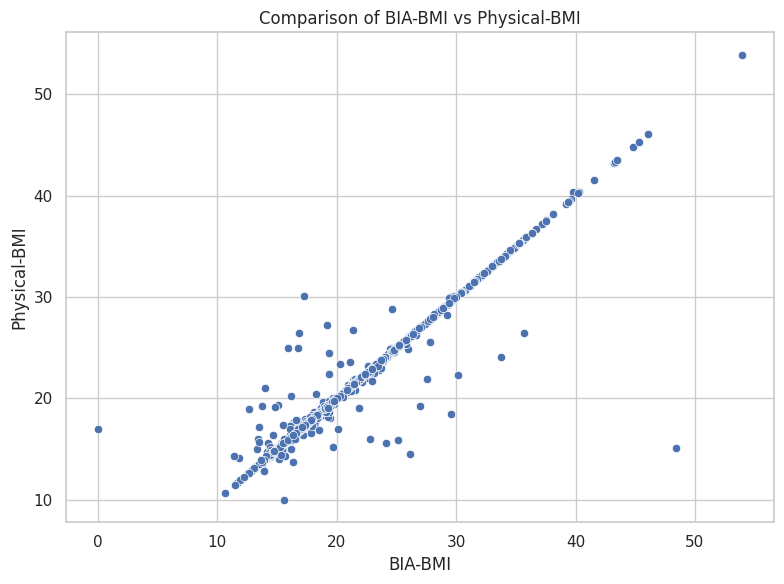

In [80]:
bmi_data = train_data[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

# Scatter plot to compare BIA-BMI and Physical-BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BIA-BIA_BMI', y='Physical-BMI',
    data=bmi_data,
    color='b'
)
plt.title('Comparison of BIA-BMI vs Physical-BMI')
plt.xlabel('BIA-BMI')
plt.ylabel('Physical-BMI')

plt.tight_layout()
plt.show()

In [81]:
bmi_measures = train_data[['BIA-Season', 'Physical-Season']].dropna()
bmi_season_counts = bmi_measures.groupby(['BIA-Season', 'Physical-Season']).size().reset_index(name='Count')
bmi_season_counts

,BIA-Season,Physical-Season,Count
0,Fall,Fall,407
1,Fall,Missing,6
2,Fall,Spring,15
3,Fall,Summer,131
4,Fall,Winter,8
5,Missing,Fall,294
6,Missing,Missing,635
7,Missing,Spring,309
8,Missing,Summer,277
9,Missing,Winter,300
